In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.tsa

# import seaborn as sns

# plt.xkcd()
# plt.rcParams['font.size'] = 6
plt.rcParams["figure.dpi"] = 600
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.family"] = "Comic Neue"
plt.rcParams["grid.linewidth"] = 0.75
plt.rcParams["grid.linestyle"] = "dotted"
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.facecolor"] = "#f6f1e2"
plt.rcParams["axes.facecolor"] = "fcf8ed"
# plt.rcParams["figure.facecolor"] = "42737d"
# plt.rcParams["axes.facecolor"] = "42737d"


pd.set_option("display.max_columns", None)
pd.set_option("display.precision", 3)

# plt.rcParams.keys()

## 3.1 STATISTICS BASICS

In [2]:
stat_data = pd.read_csv("statistics_data.csv", index_col="STUDENT ")

In [3]:
stat_data.aggregate(["mean", "var", "std"])

QUIZ    FINAL
mean  7.420   75.107
var   1.317  172.943
std   1.148   13.151

<Axes: xlabel='QUIZ', ylabel='FINAL'>

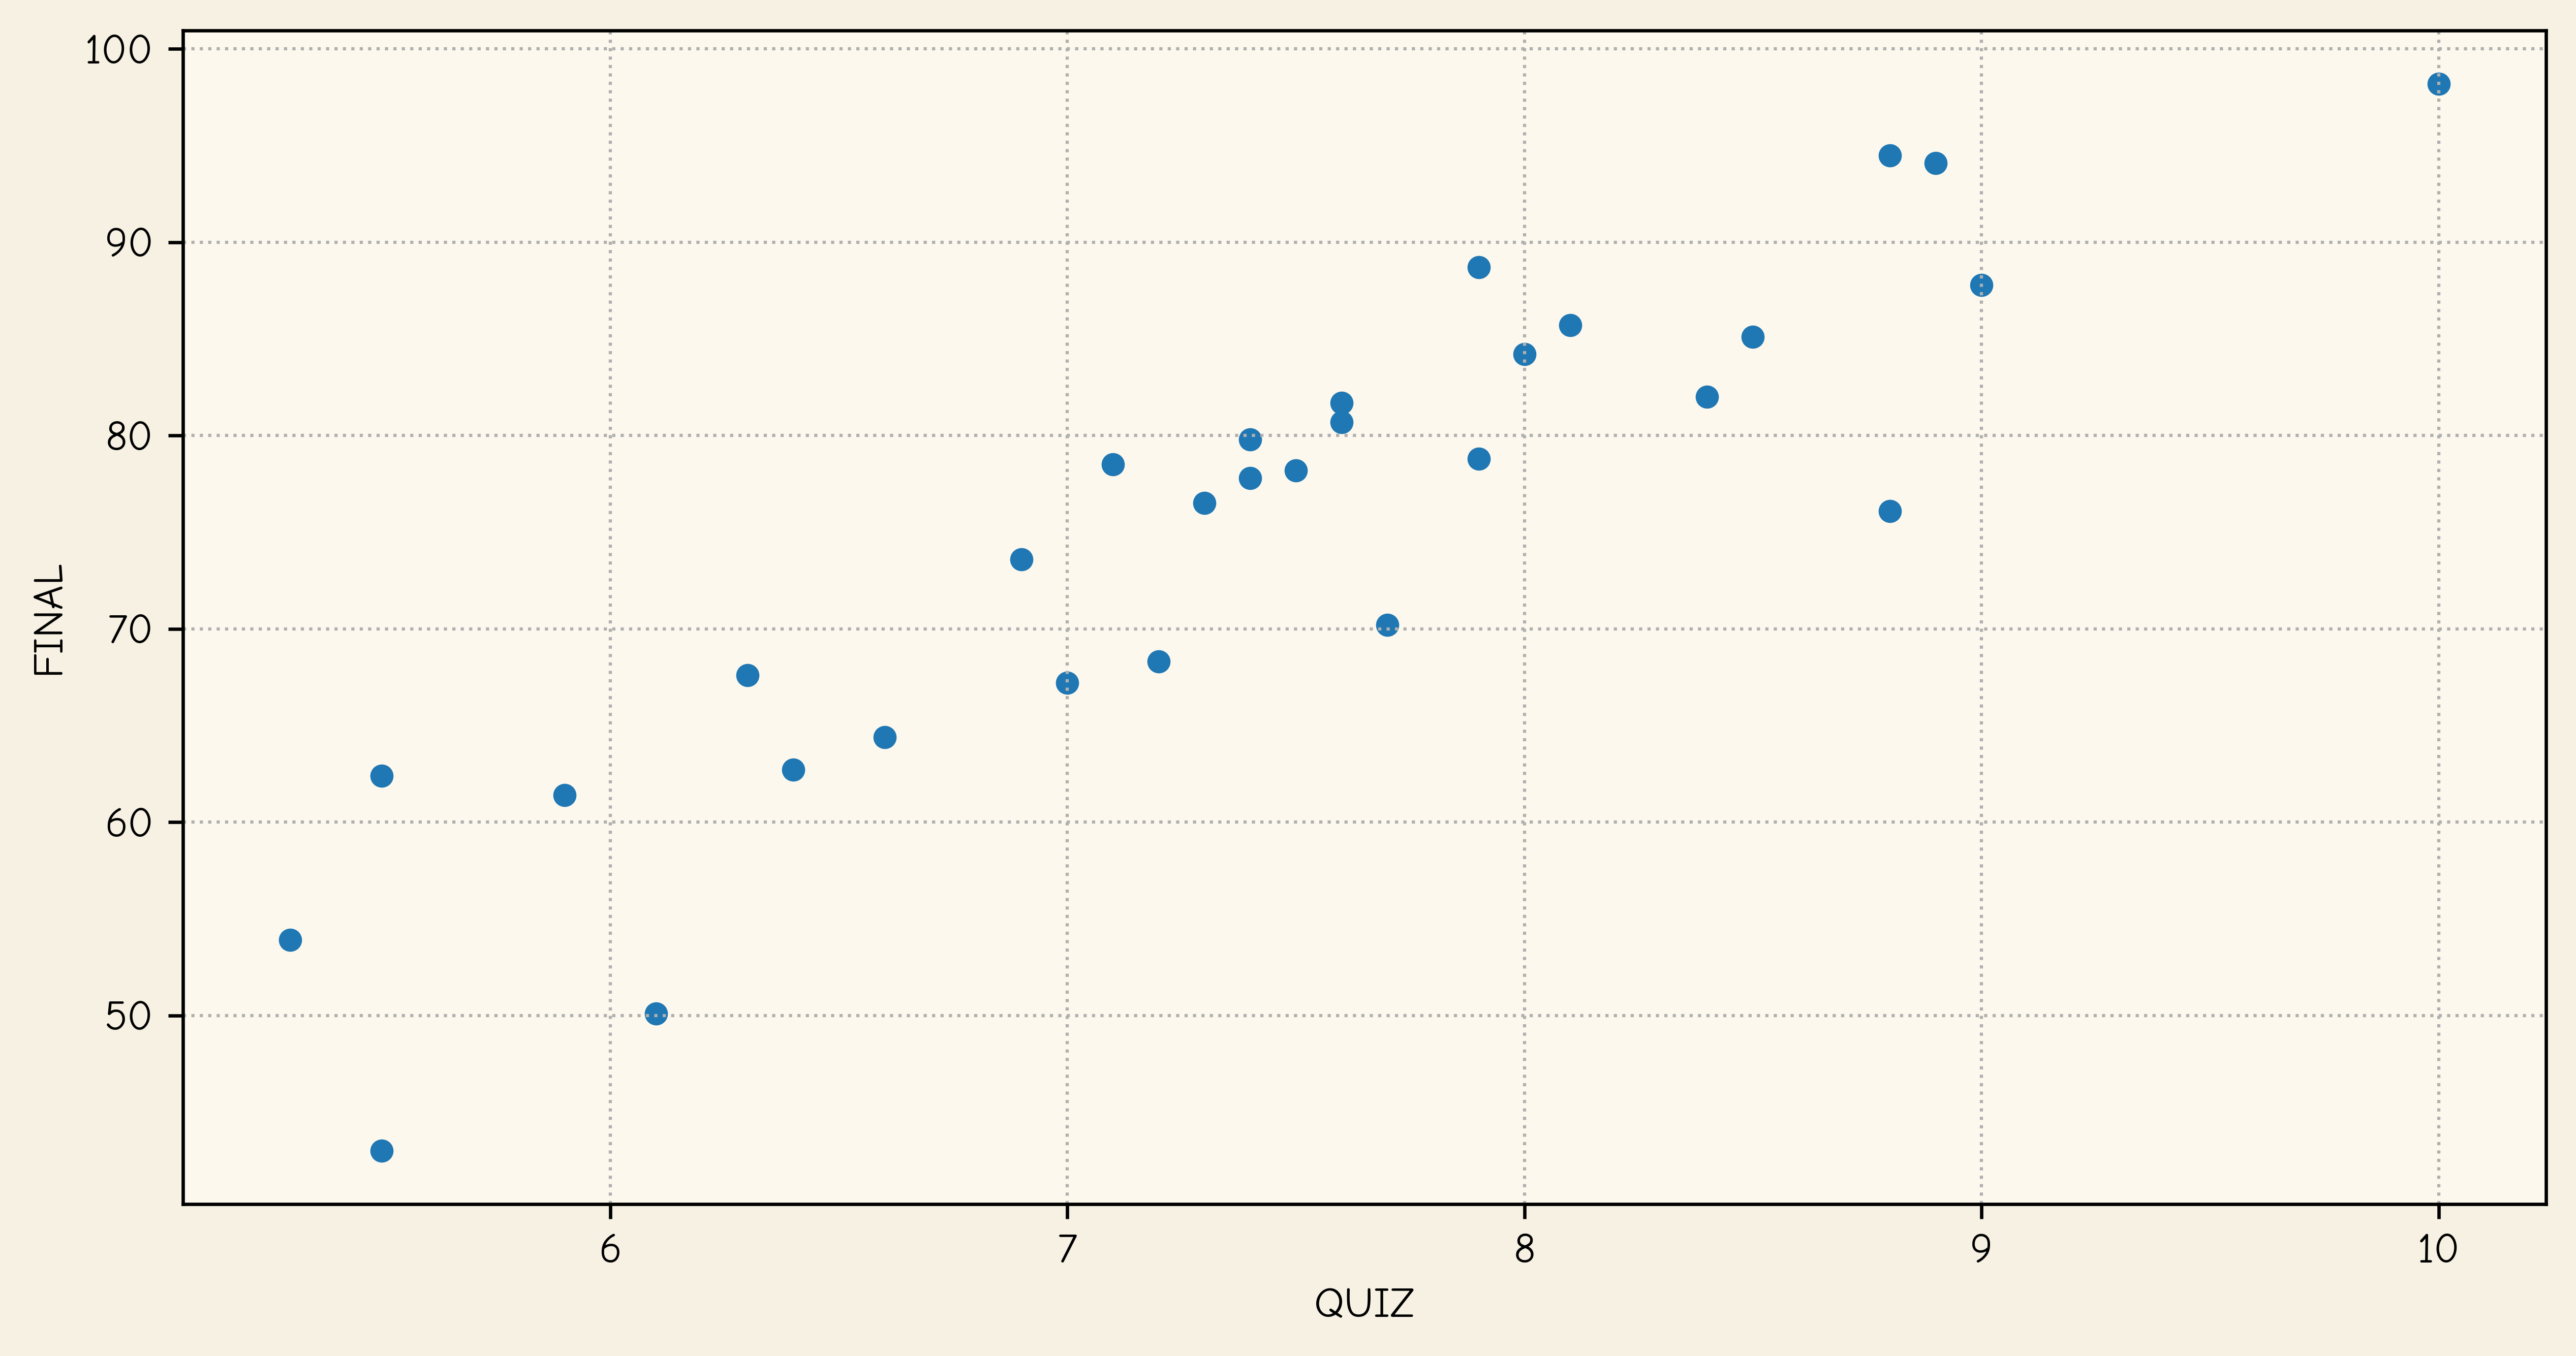

In [4]:
stat_data.plot(x="QUIZ", y="FINAL", kind="scatter")

In [5]:
stat_data.corr()

QUIZ  FINAL
QUIZ   1.000  0.901
FINAL  0.901  1.000

In [6]:
stat_data.cov()  # var(x), var(y), covar(x)(y)

QUIZ    FINAL
QUIZ    1.317   13.592
FINAL  13.592  172.943

In [7]:
# two_dice = pd.DataFrame(np.random.randint(1, 7, size=30) + np.random.randint(1, 7, size=30),columns=["indi"])
two_dice = pd.read_csv("dice_roll.csv", names=["indi"], skiprows=[0])
two_dice.aggregate(["mean", "std"])

indi
mean  7.167
std   2.086

<Axes: >

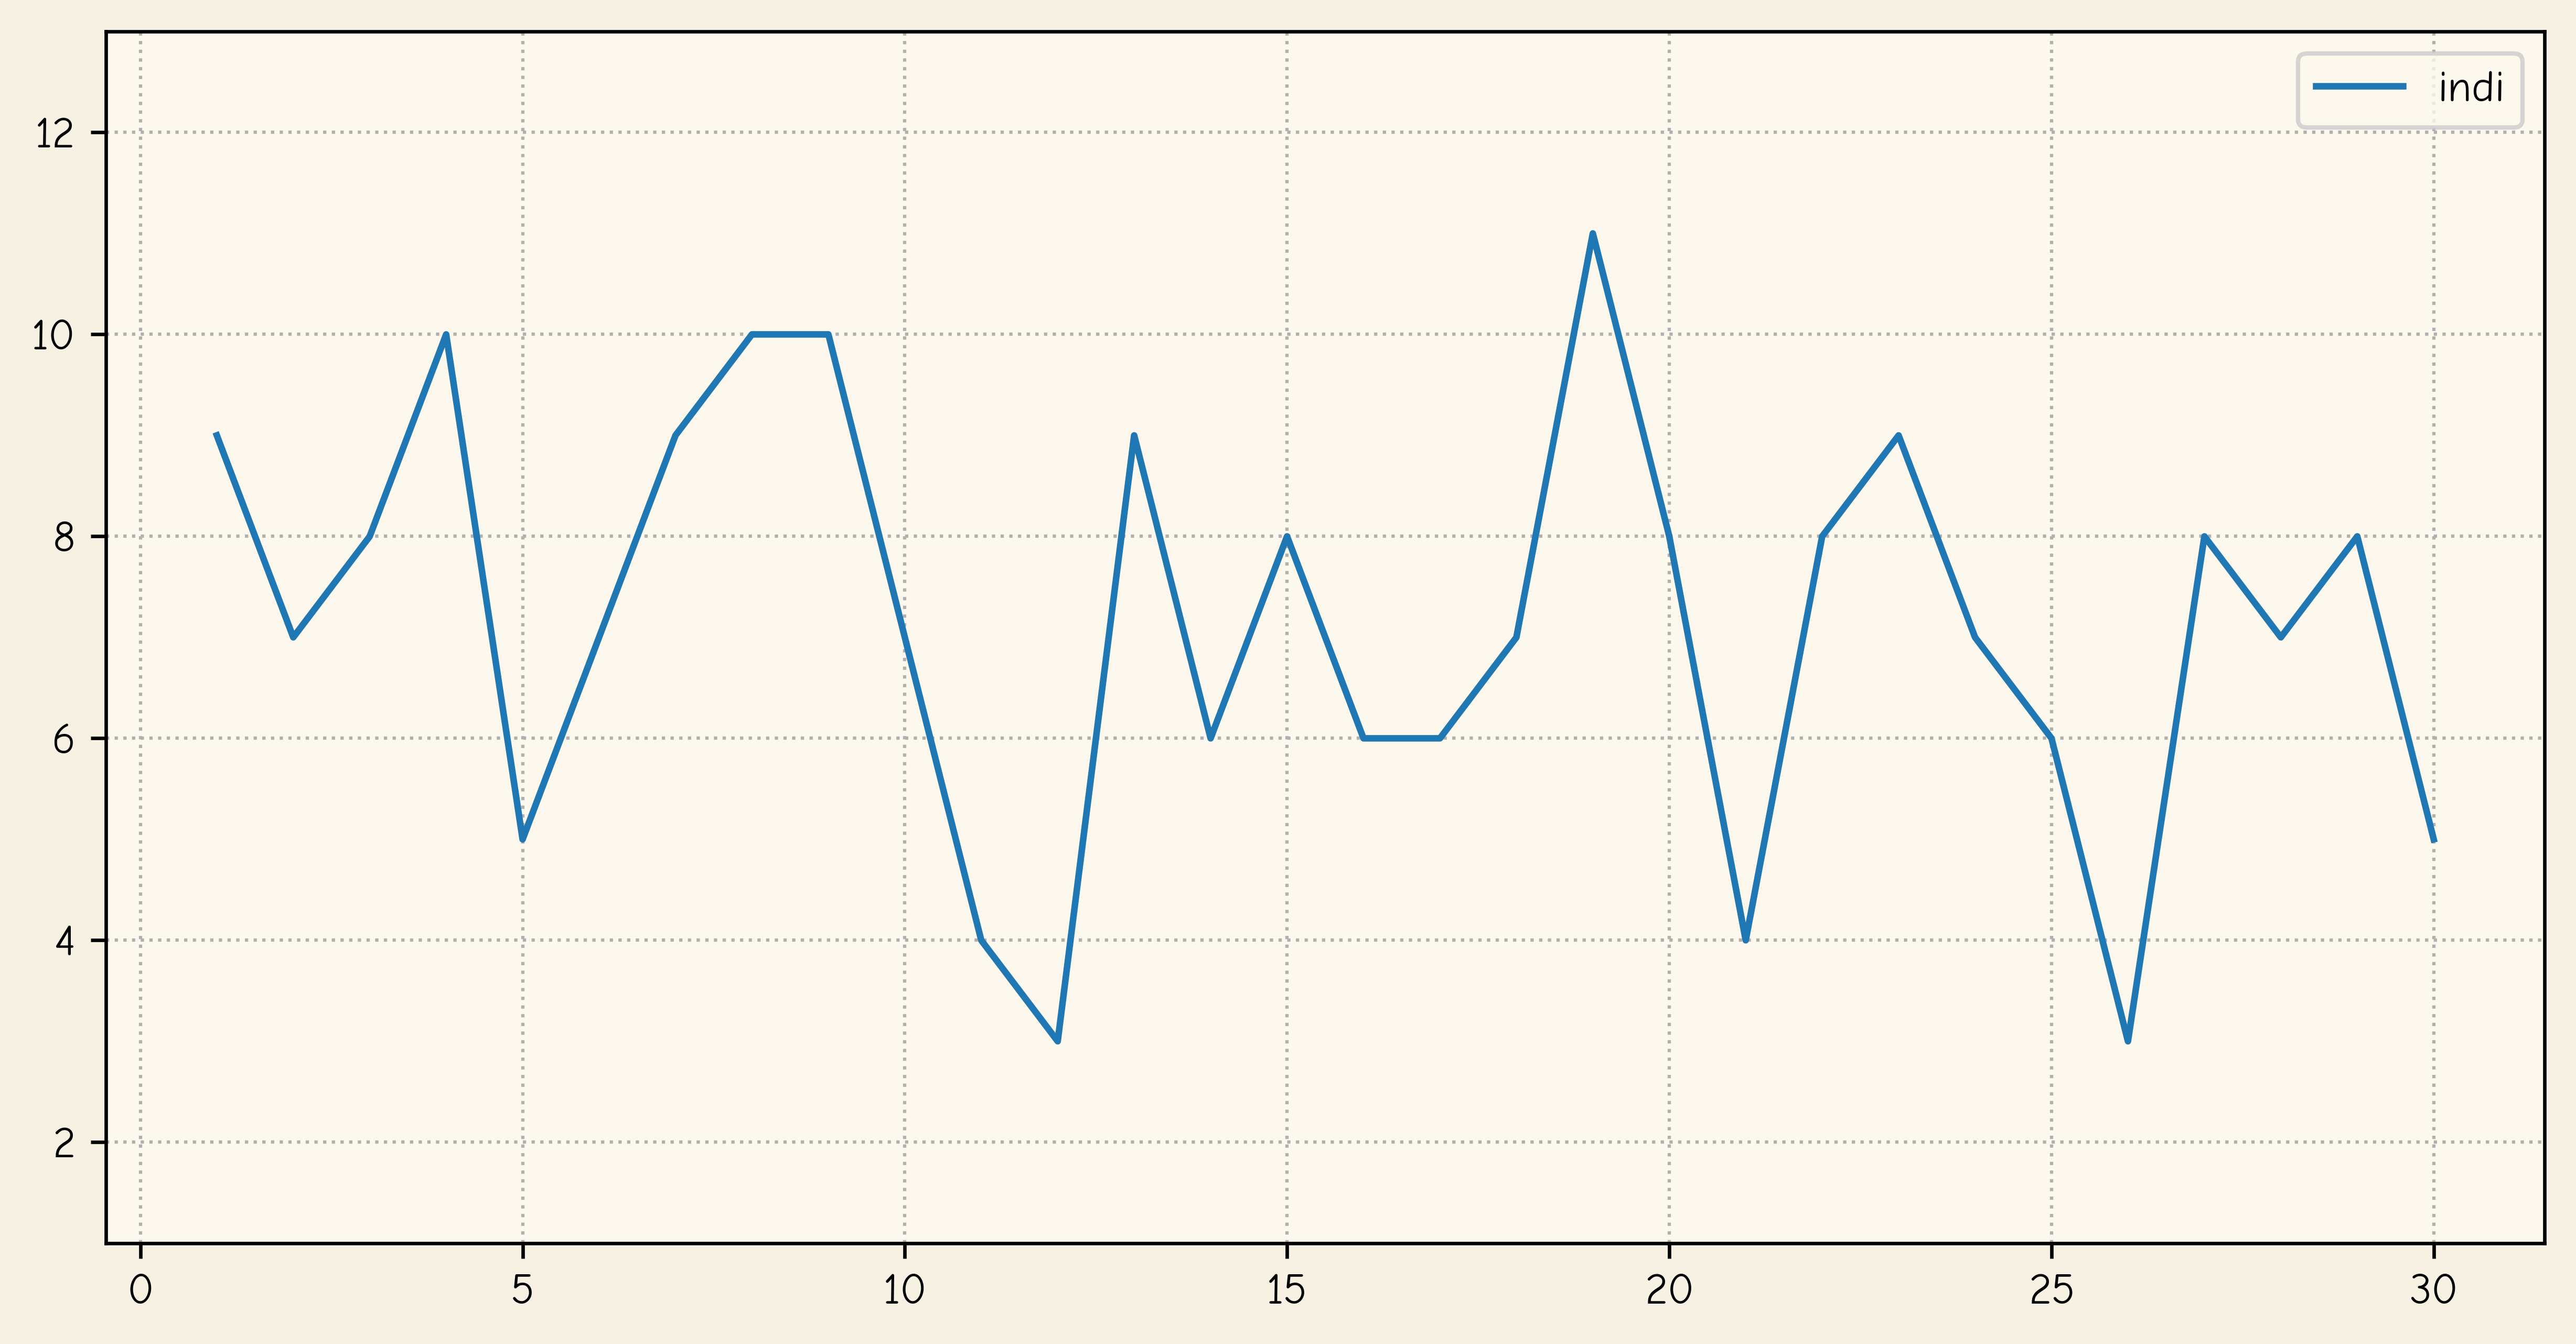

In [8]:
two_dice.plot(ylim=(1, 13))

<Axes: >

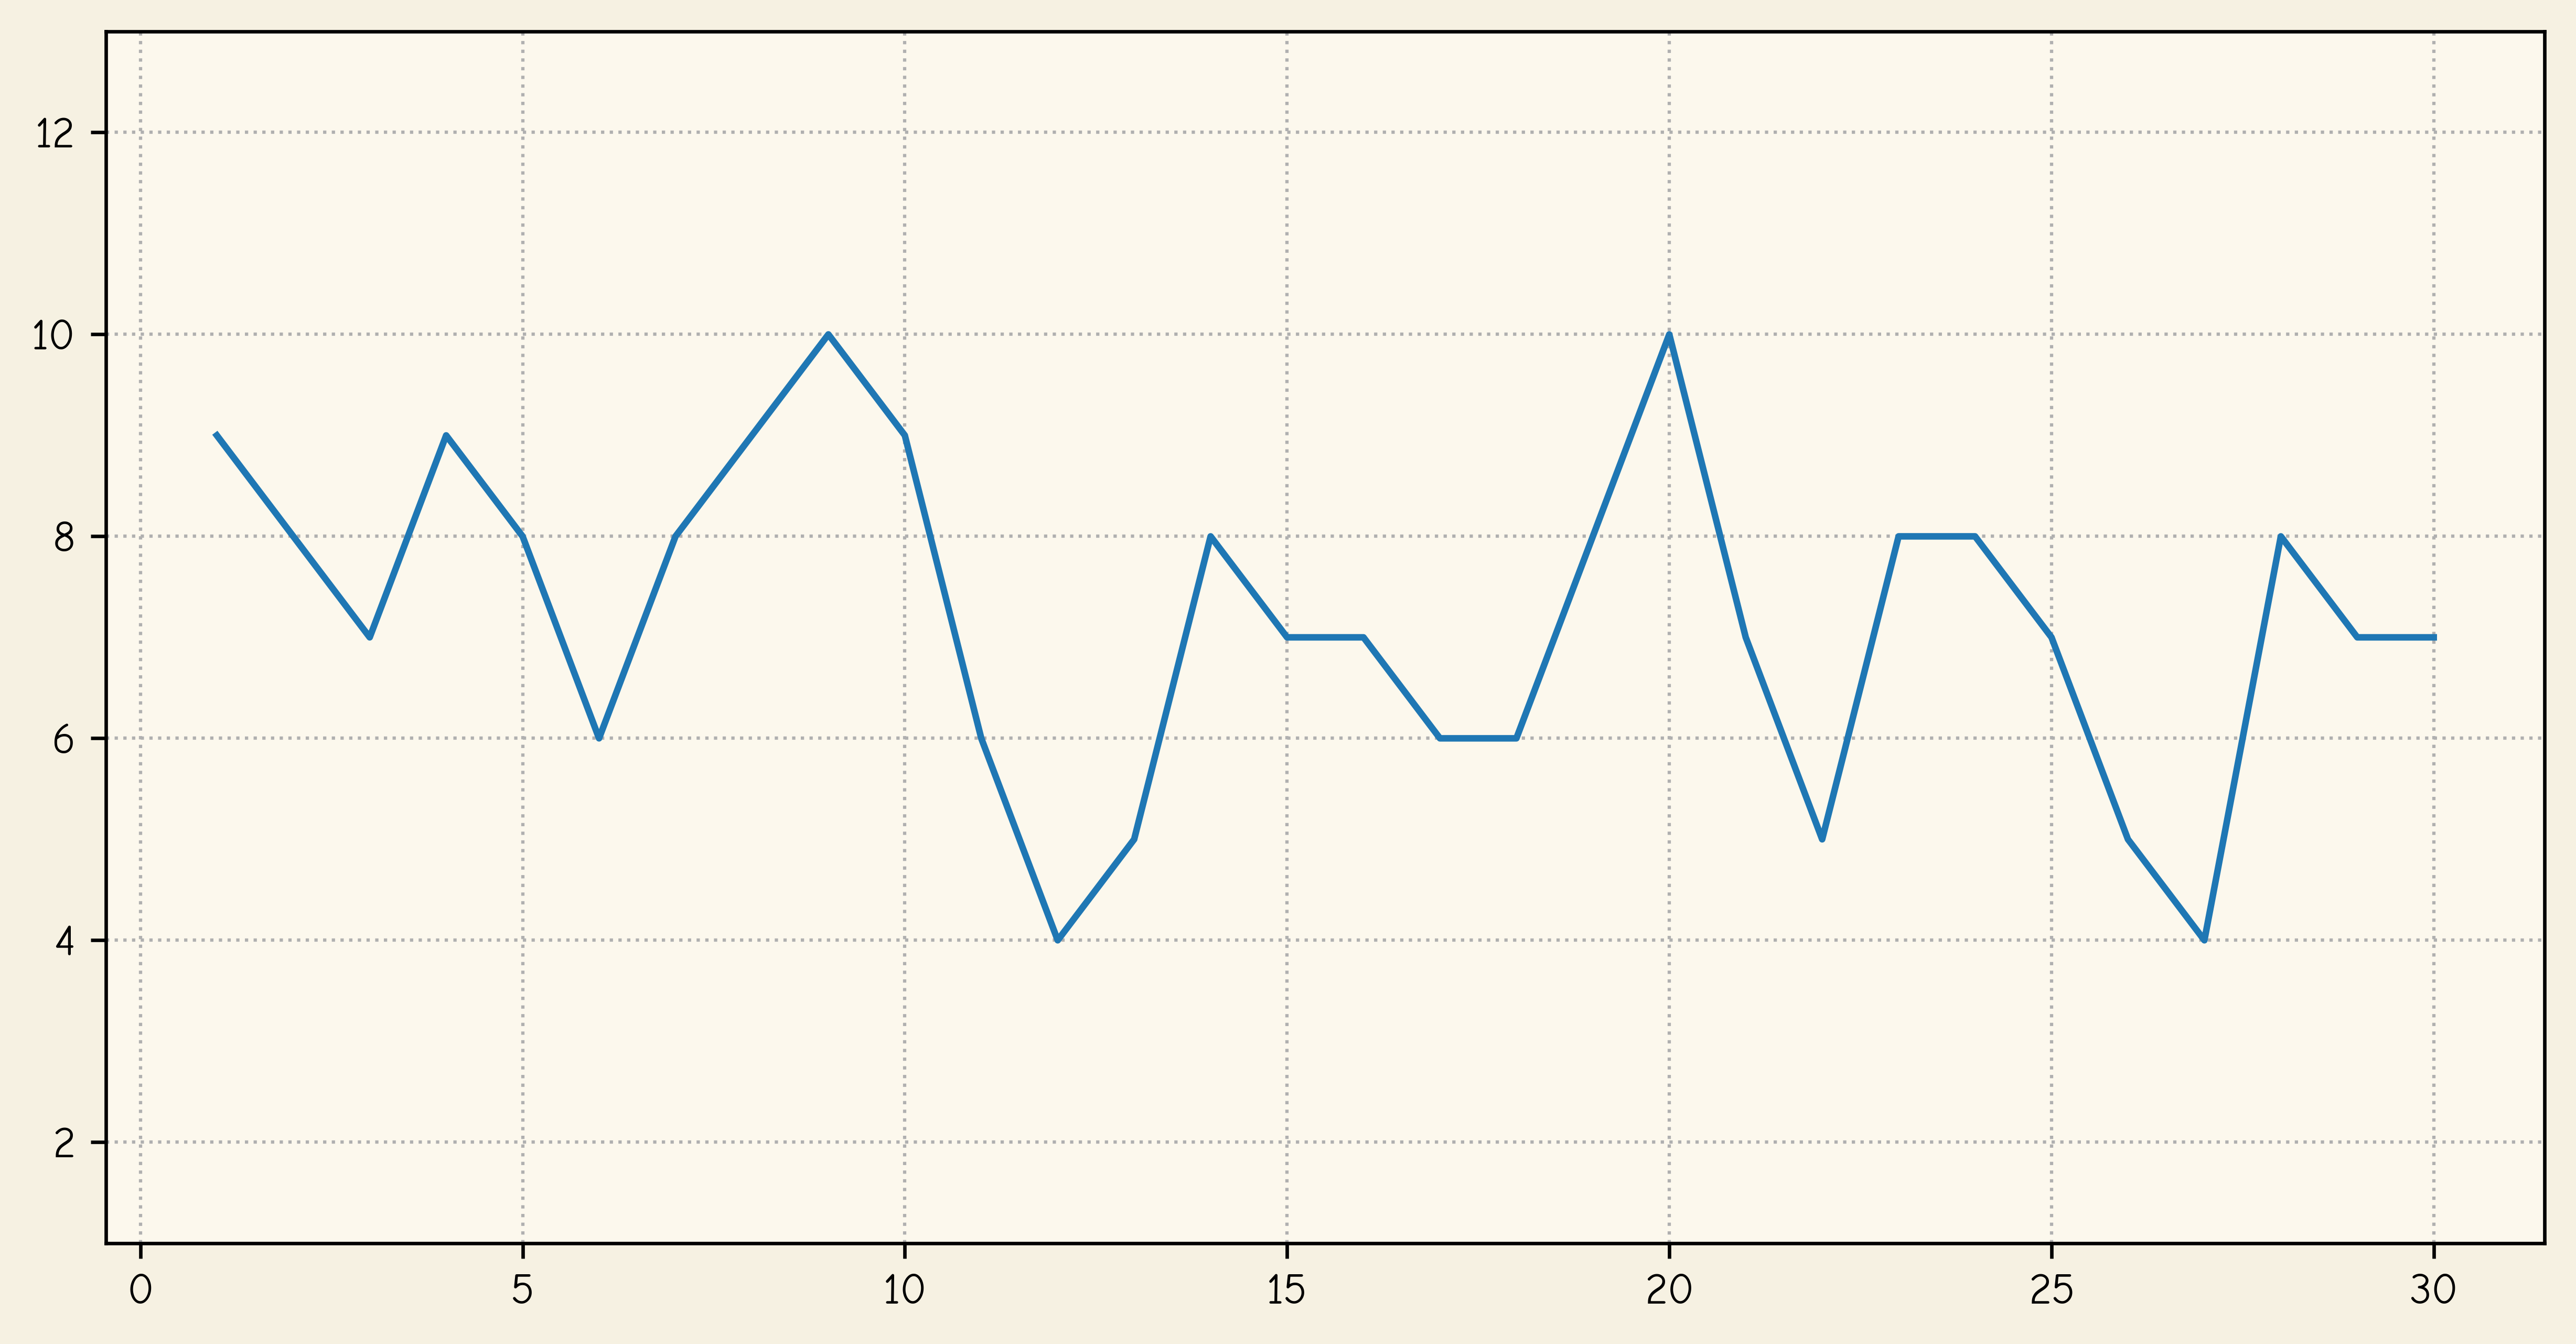

In [9]:
two_dice["shift"] = two_dice["indi"].shift(1)
two_dice["depi"] = np.round((0.3 * two_dice["indi"]) + (0.7 * two_dice["shift"]))
two_dice.iloc[0, 2] = 9
two_dice.depi.plot(ylim=(1, 13))

In [10]:
## Wt is Wt = 7–.97 (Wt-1 – 7) + at
two_dice["osi"] = np.round(7 - 0.97 * (two_dice["shift"] - 7))
two_dice

indi  shift  depi   osi
1      9    NaN   9.0   NaN
2      7    9.0   8.0   5.0
3      8    7.0   7.0   7.0
4     10    8.0   9.0   6.0
5      5   10.0   8.0   4.0
6      7    5.0   6.0   9.0
7      9    7.0   8.0   7.0
8     10    9.0   9.0   5.0
9     10   10.0  10.0   4.0
10     7   10.0   9.0   4.0
11     4    7.0   6.0   7.0
12     3    4.0   4.0  10.0
13     9    3.0   5.0  11.0
14     6    9.0   8.0   5.0
15     8    6.0   7.0   8.0
16     6    8.0   7.0   6.0
17     6    6.0   6.0   8.0
18     7    6.0   6.0   8.0
19    11    7.0   8.0   7.0
20     8   11.0  10.0   3.0
21     4    8.0   7.0   6.0
22     8    4.0   5.0  10.0
23     9    8.0   8.0   6.0
24     7    9.0   8.0   5.0
25     6    7.0   7.0   7.0
26     3    6.0   5.0   8.0
27     8    3.0   4.0  11.0
28     7    8.0   8.0   6.0
29     8    7.0   7.0   7.0
30     5    8.0   7.0   6.0

<Axes: >

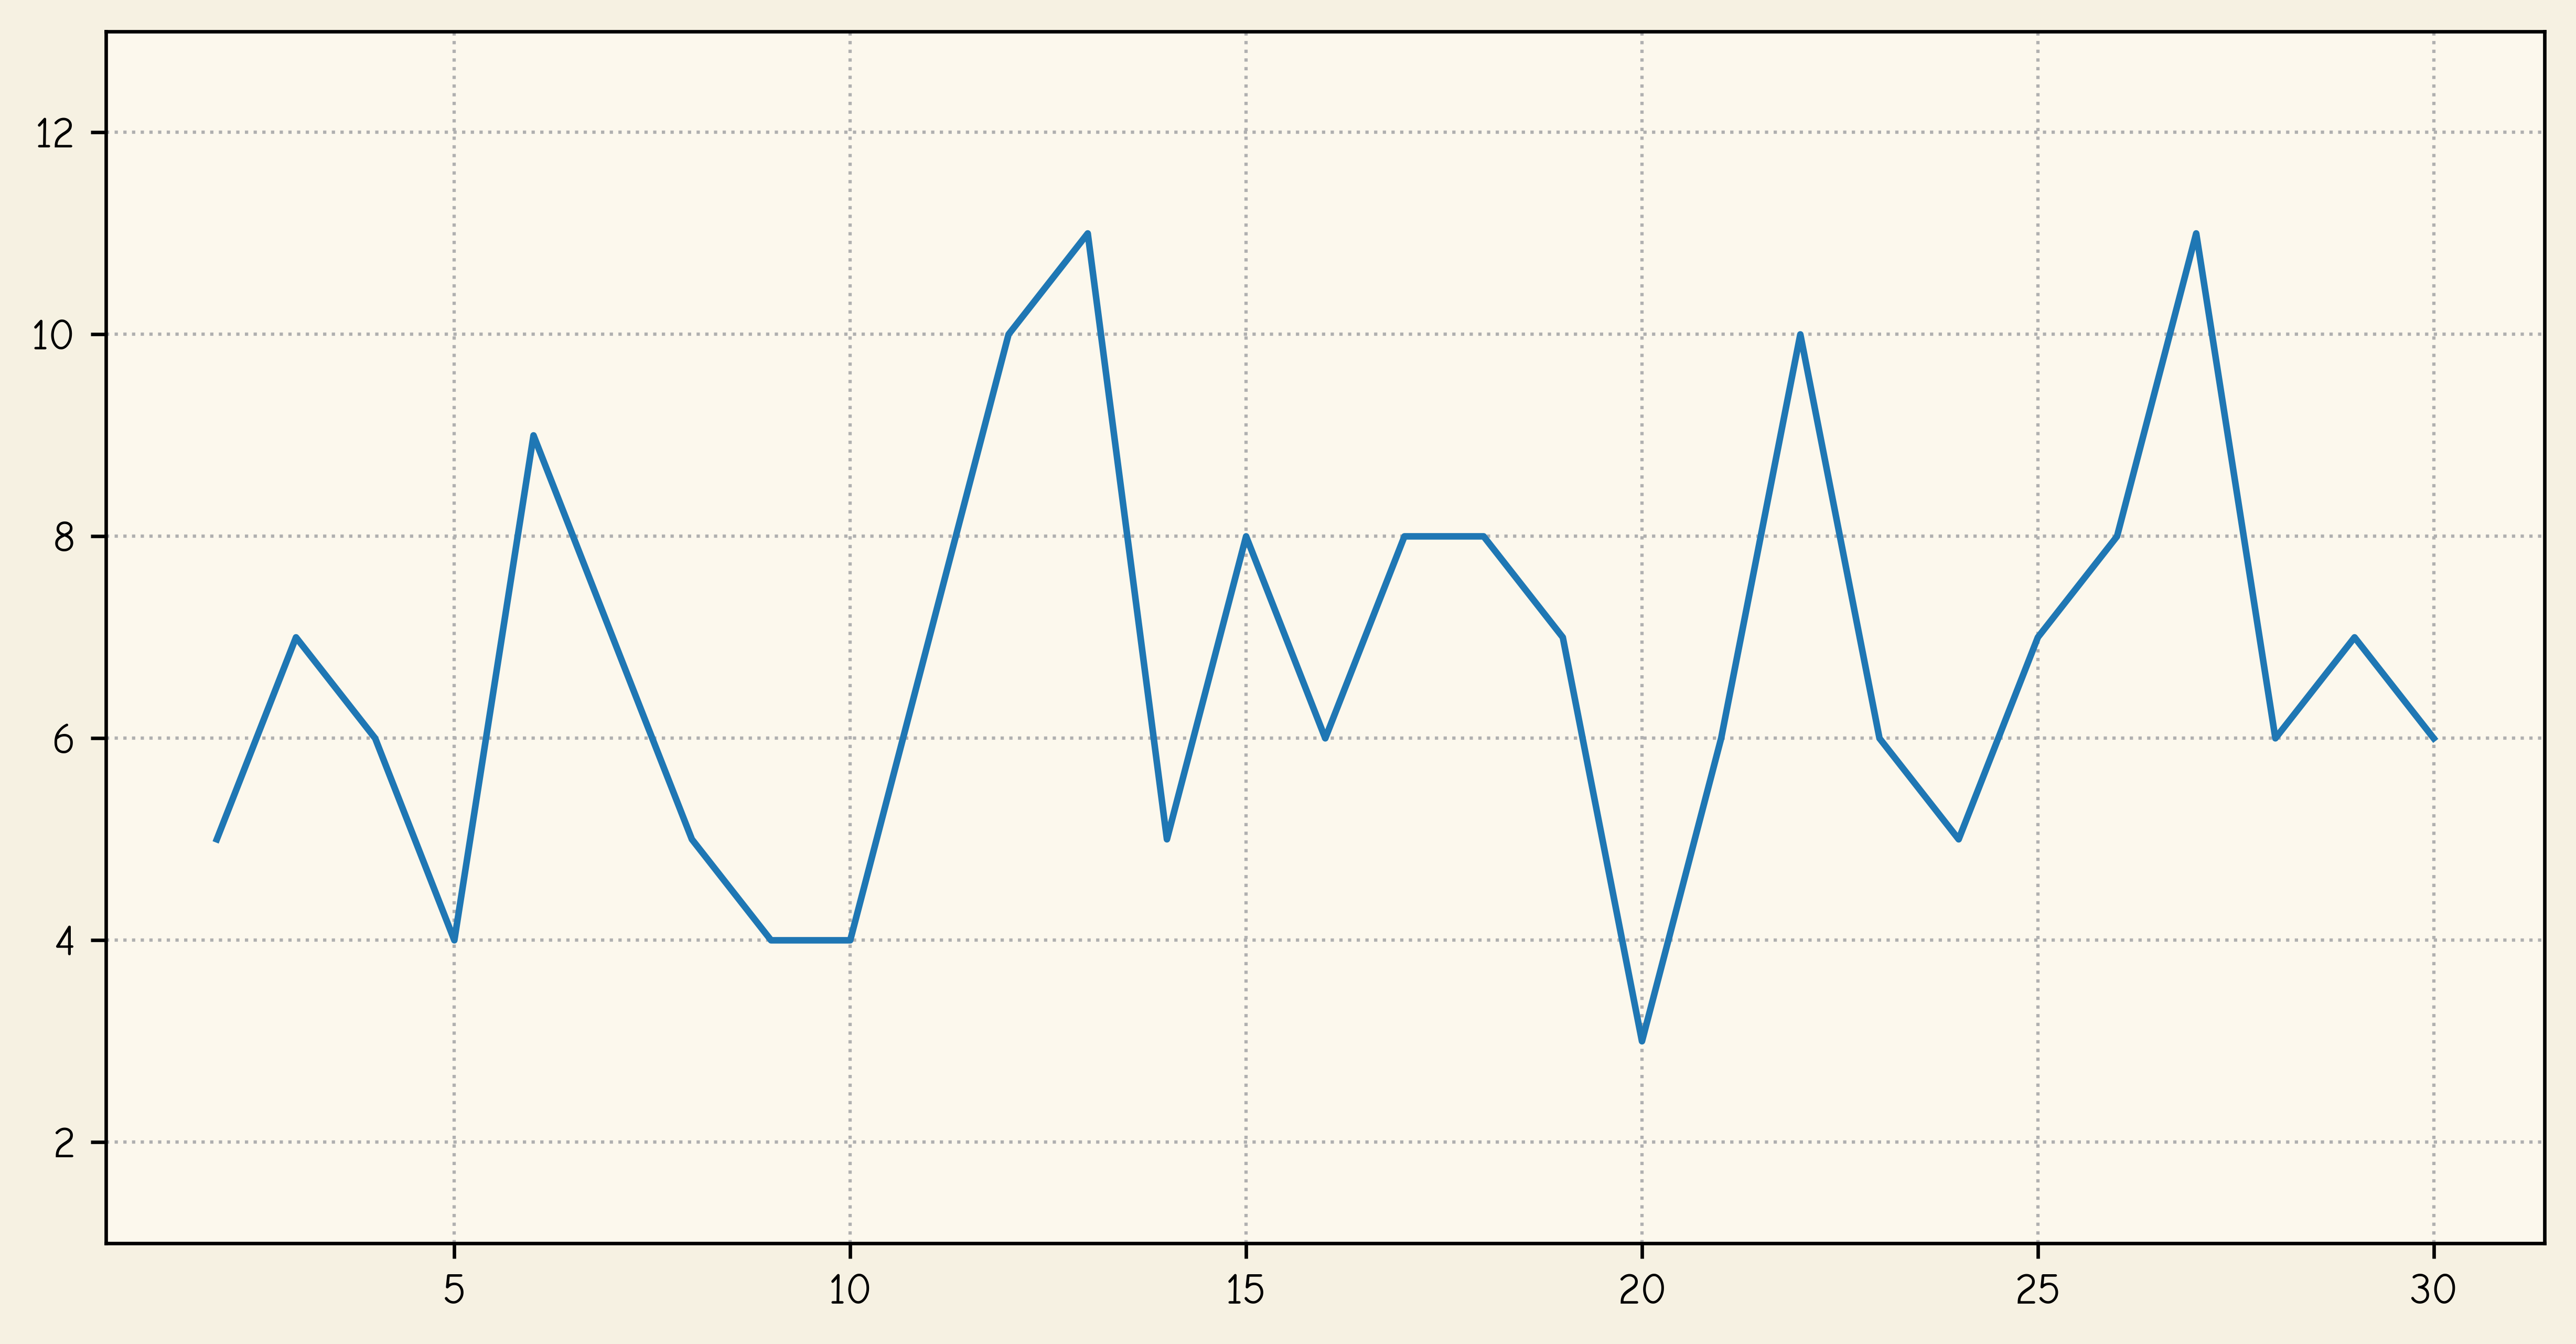

In [11]:
two_dice["osi"].plot(ylim=(1, 13))

<Axes: >

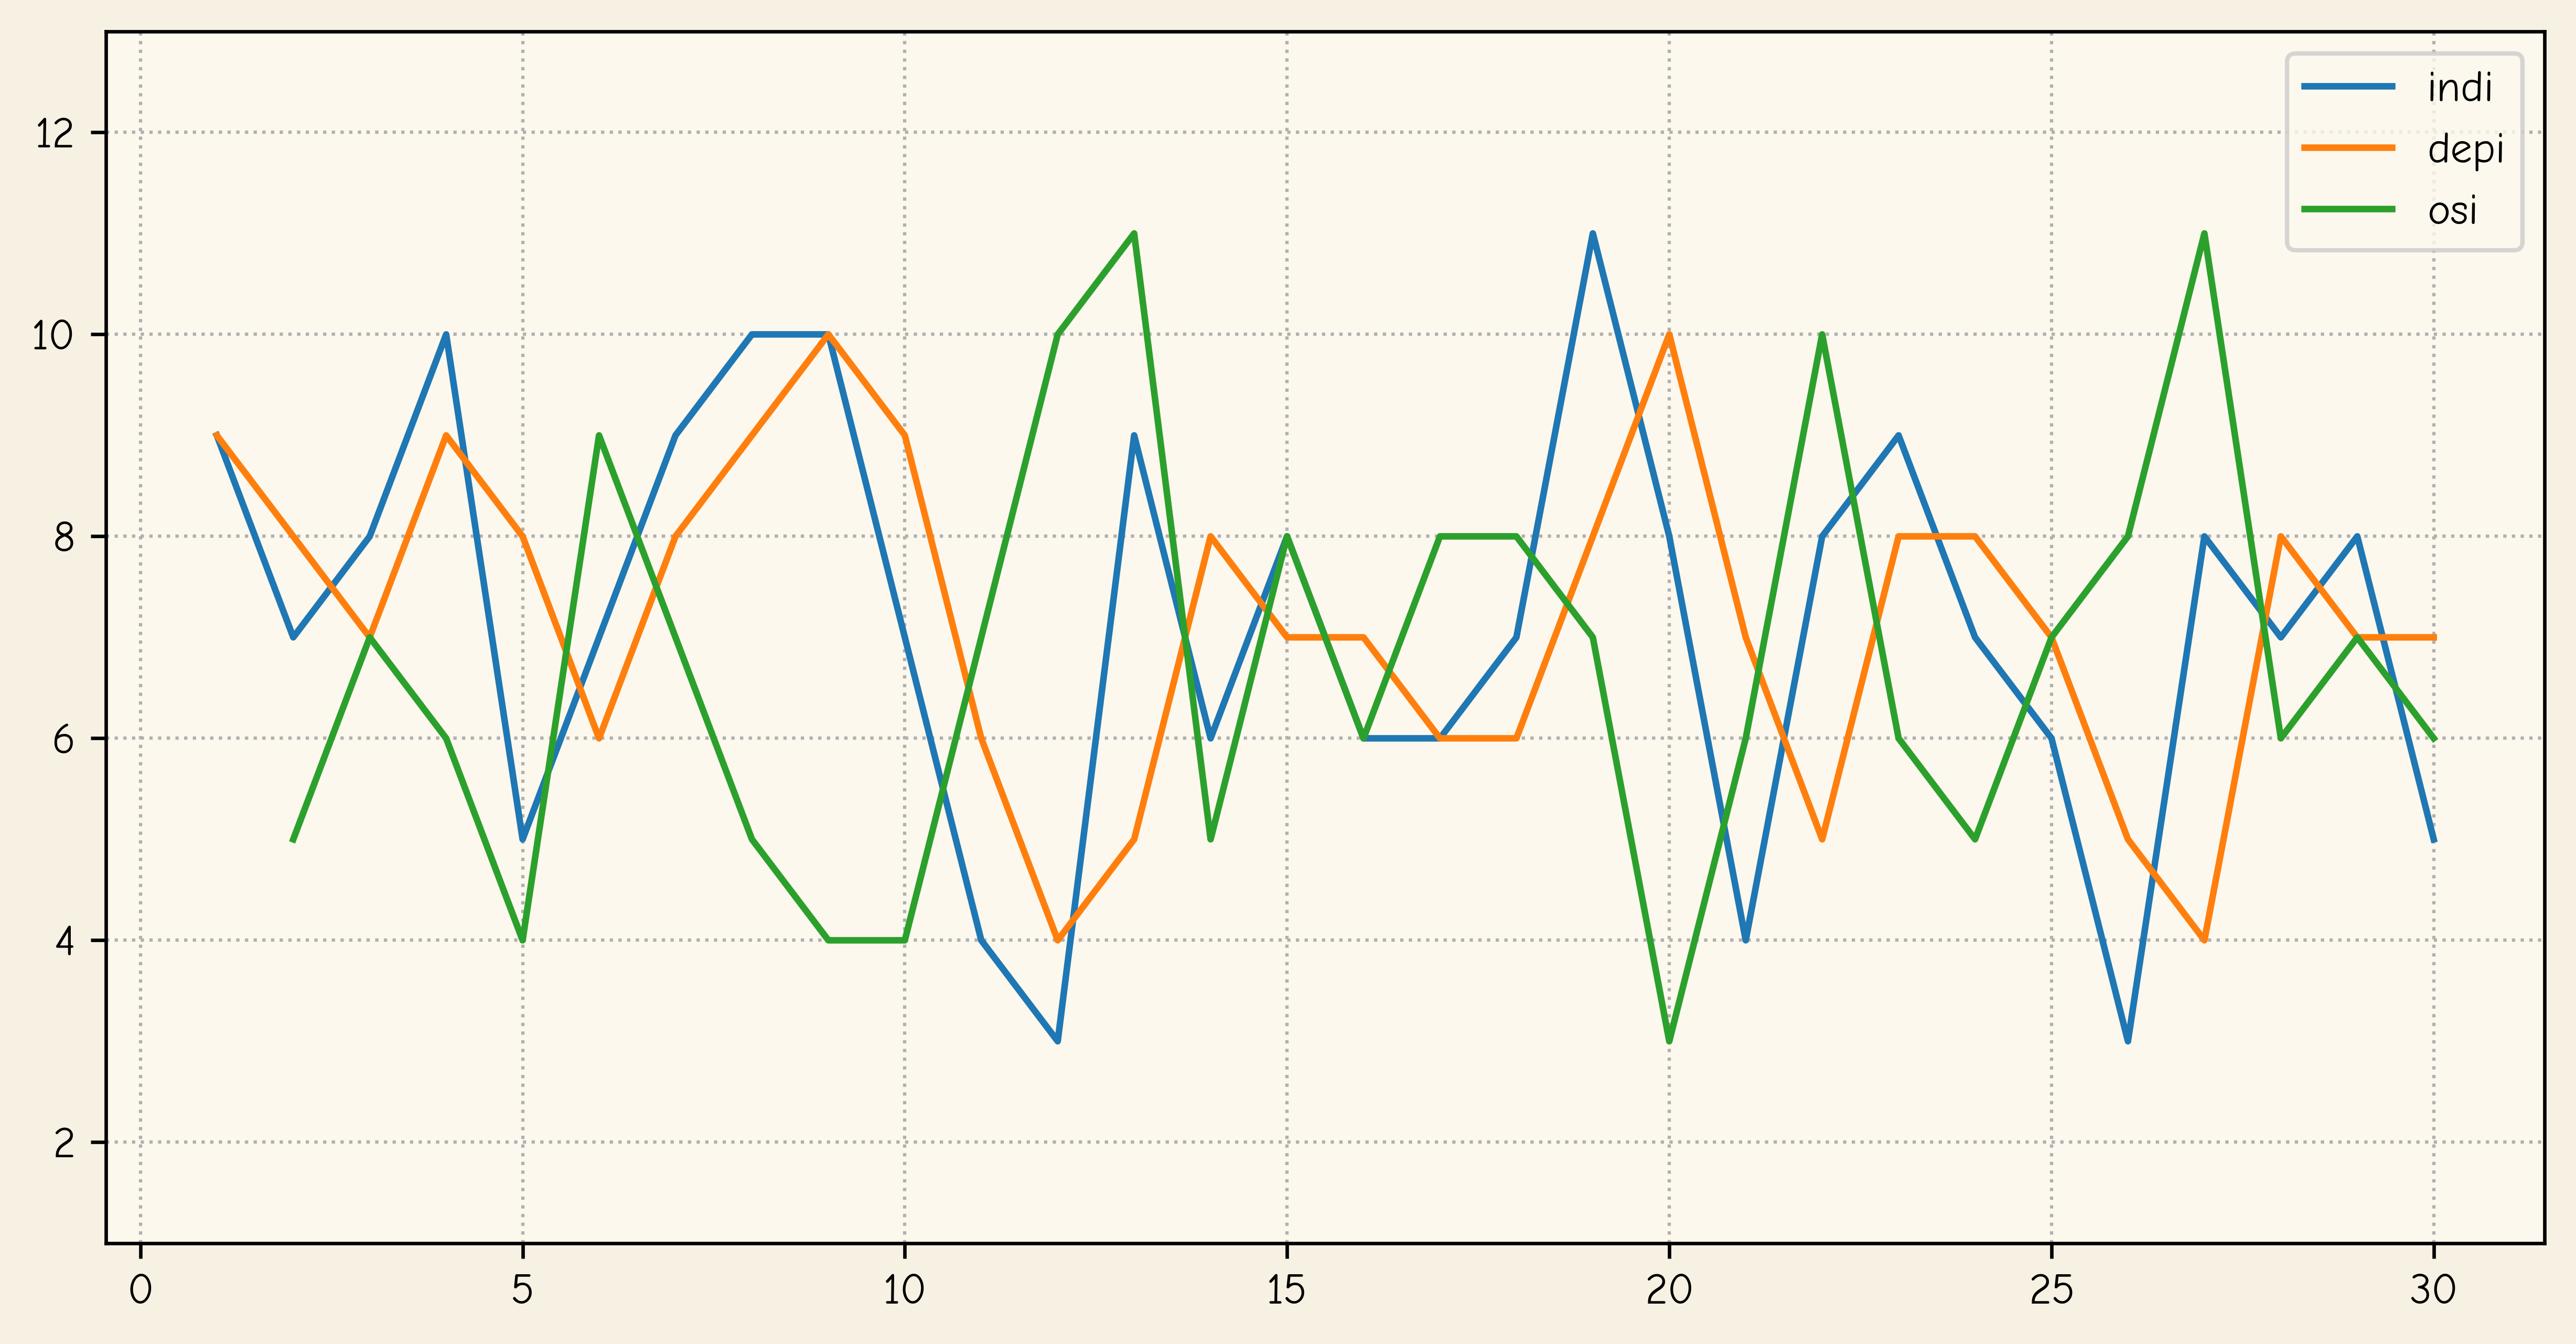

In [12]:
two_dice[["indi", "depi", "osi"]].plot(ylim=(1, 13))

## 3.2 TIME SERIES AND REALIZATIONS

#### Time Series 1: $X_t = 15 + 1.8t + 0.6ta$

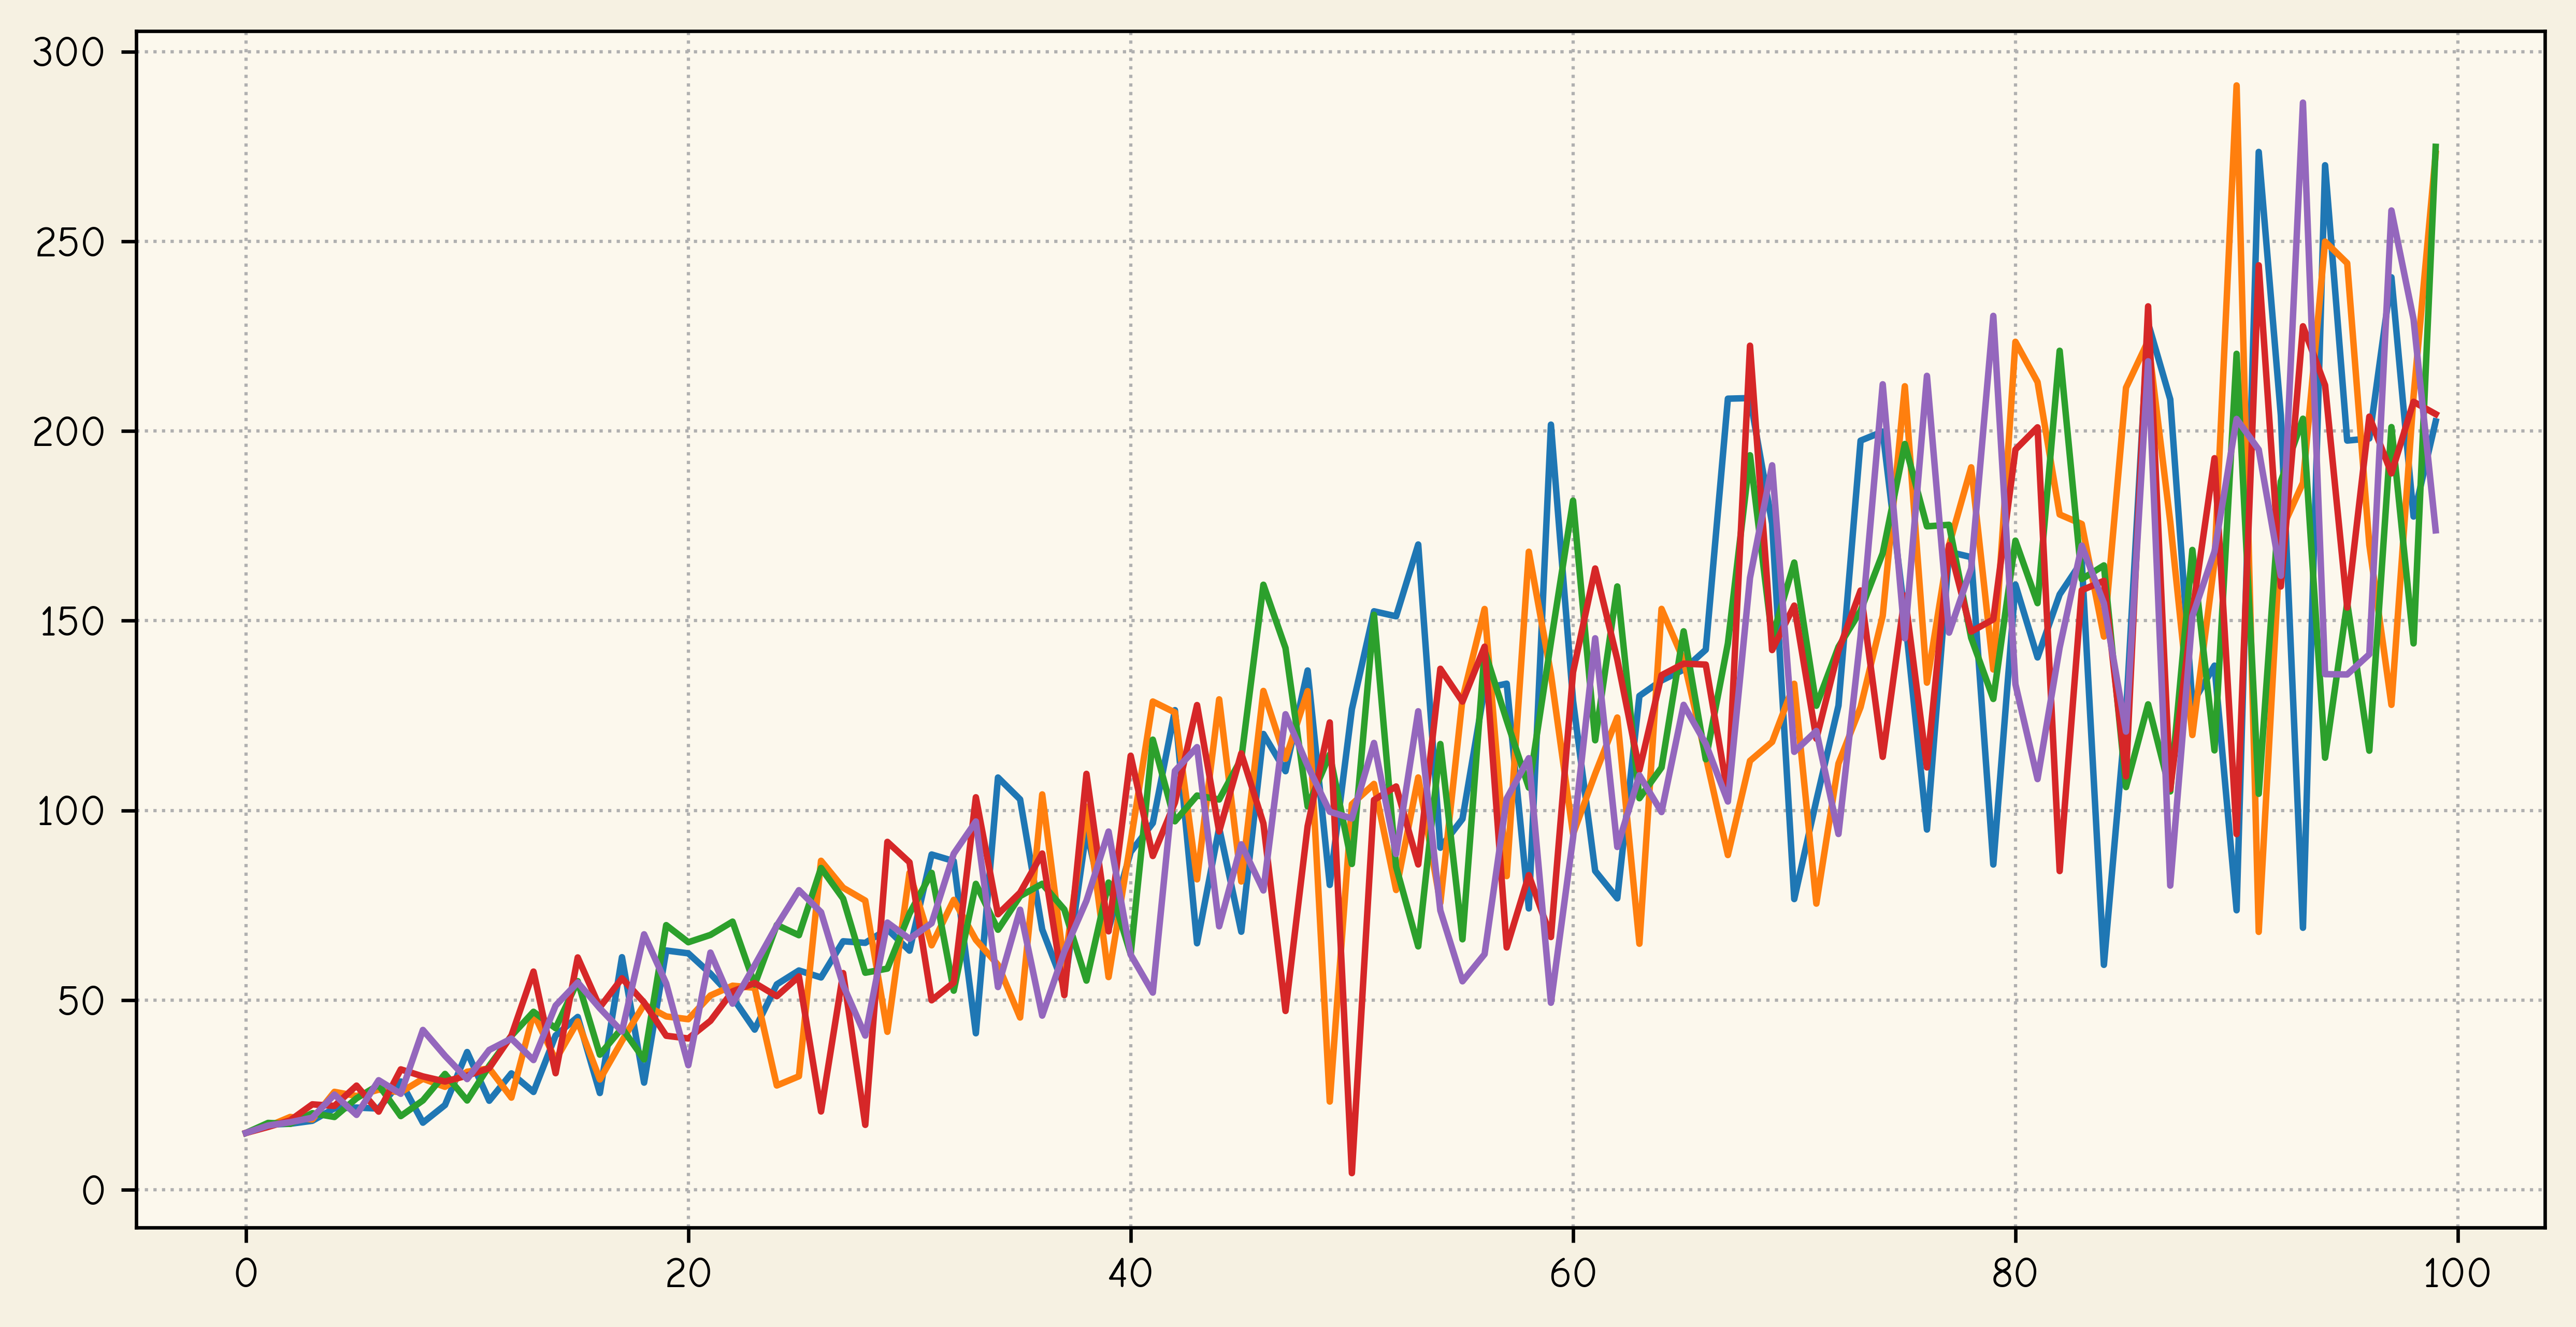

In [13]:
t_1 = pd.DataFrame(range(0, 100), columns=["t"])
for i in range(5):
    t_1["X"] = 15 + (1.8 * t_1.t) + (0.6 * t_1.t * np.random.normal(0, 1, len(t_1)))
    t_1.X.plot()

#### Time Series 2: $X_t = 3 + 0.9X_{t-1} + a$

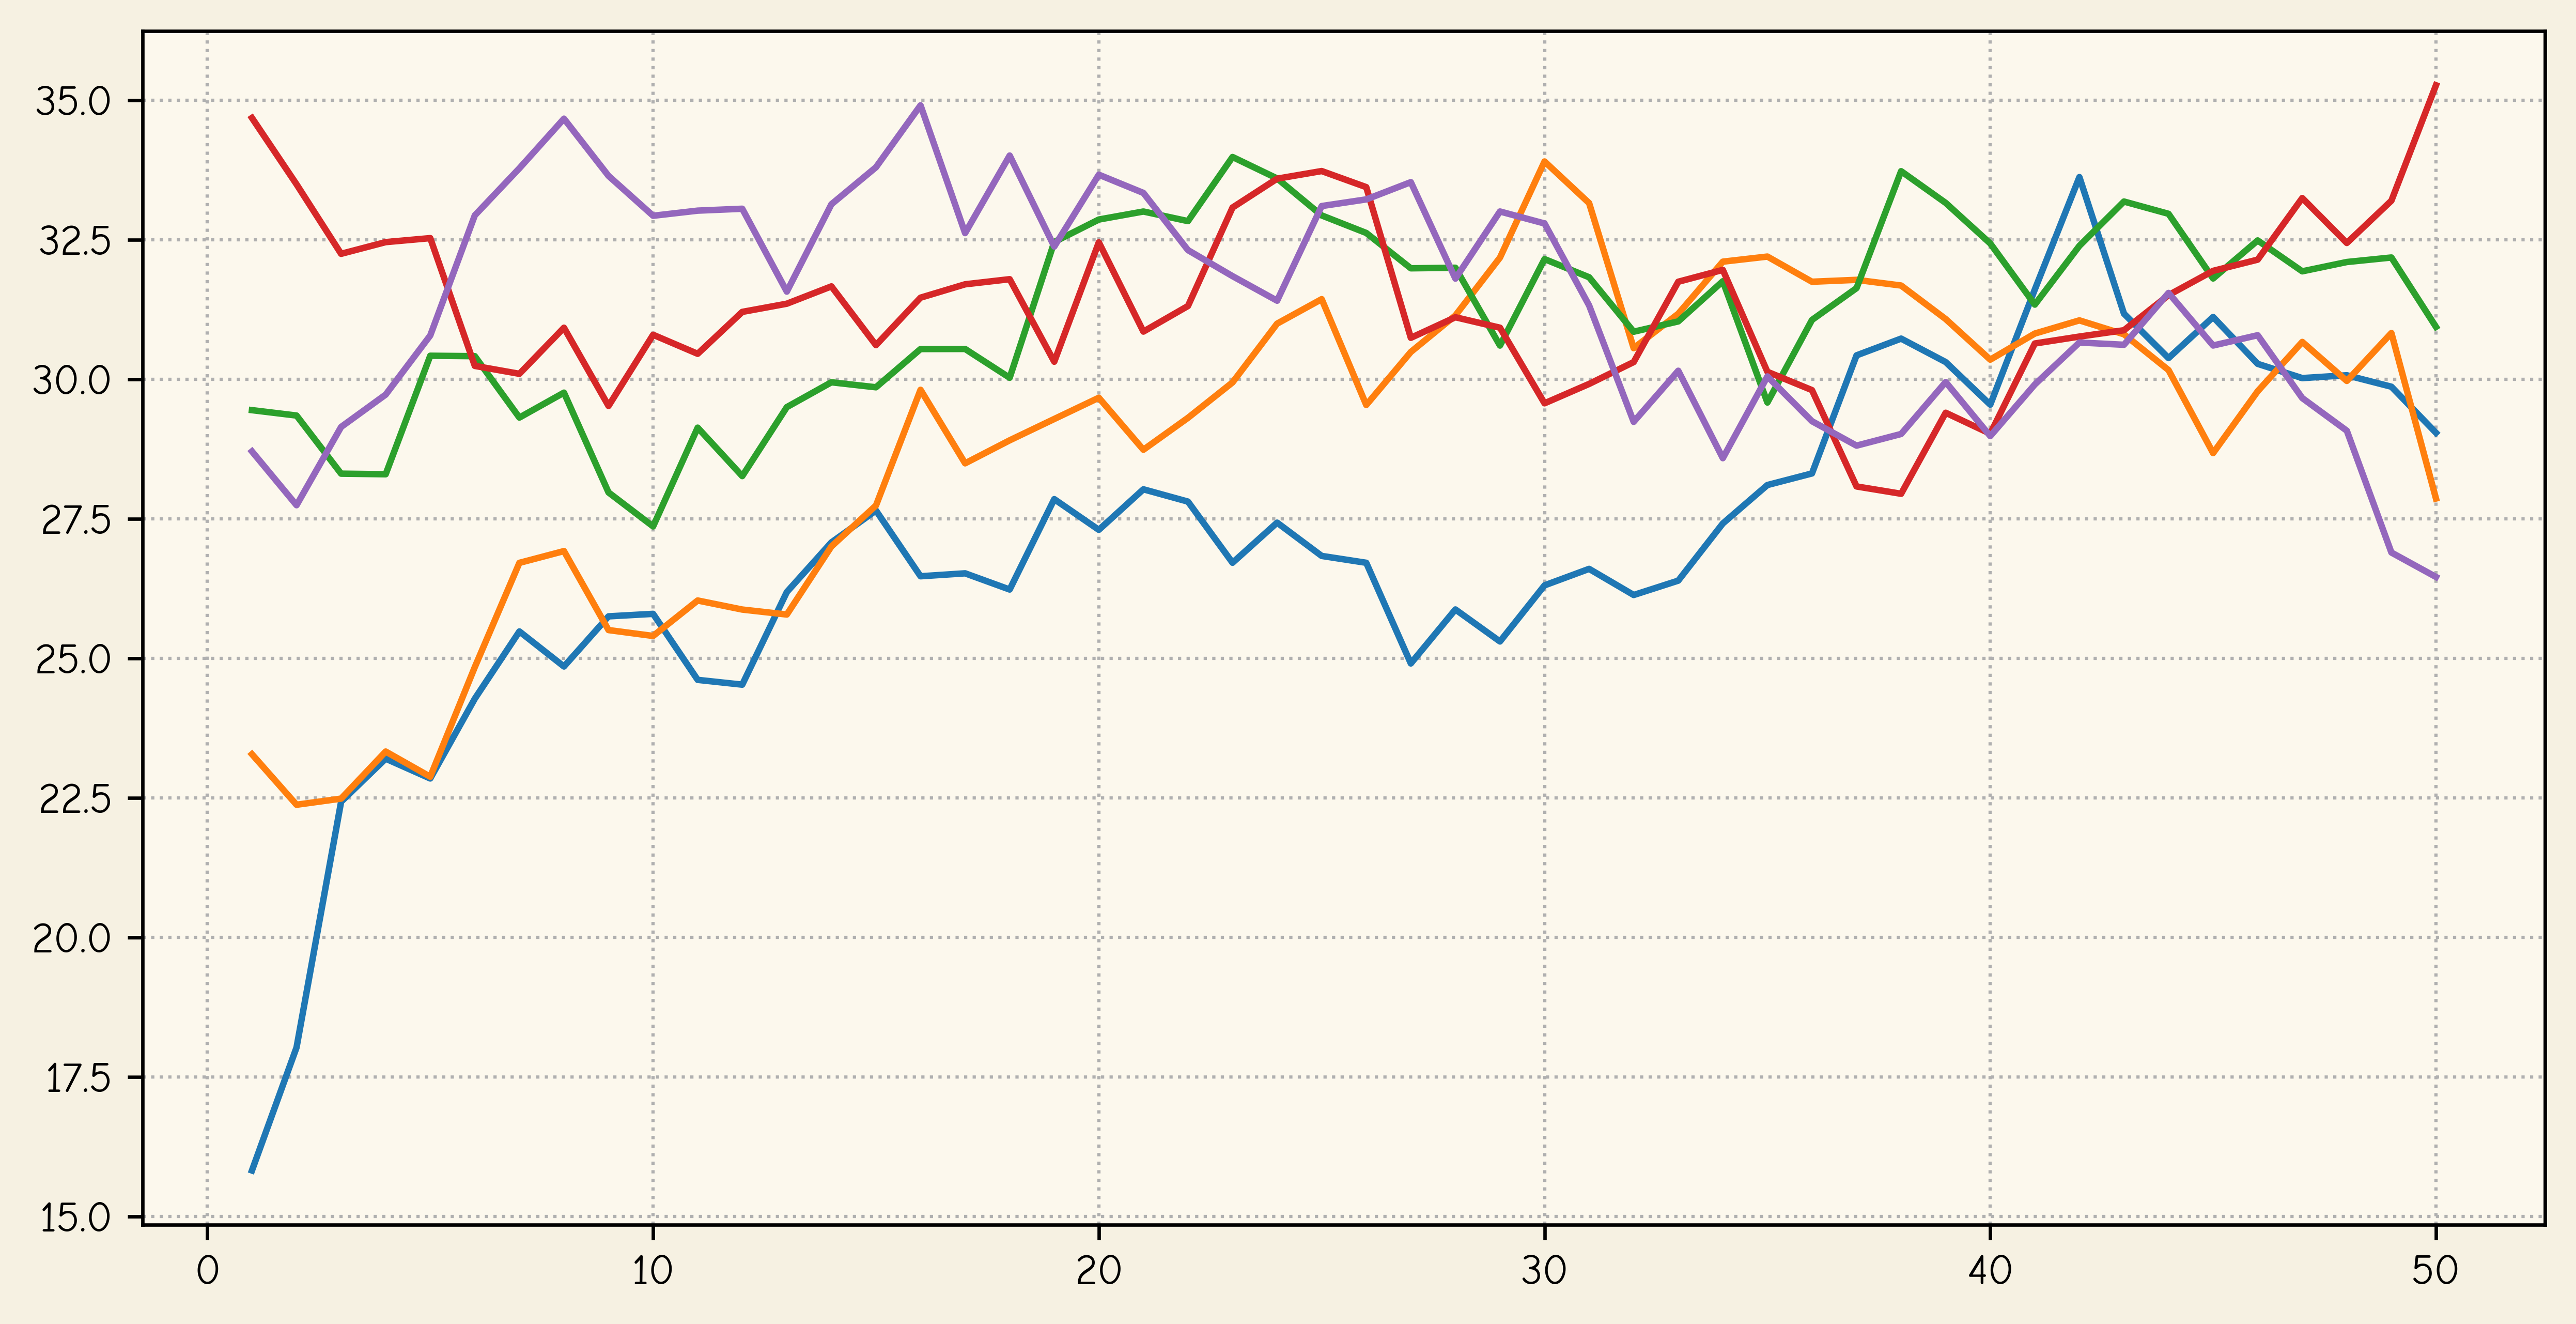

In [14]:
num_obs = 50
t_2 = pd.DataFrame(range(0, num_obs + 1), columns=["t"])
for i in range(5):
    t_2["X"] = np.random.normal(30, 7, len(t_2))
    for i in range(1, len(t_2)):
        t_2.iloc[i, 1] = 3 + (0.9 * t_2.iloc[i - 1, 1]) + np.random.normal(0, 1)
    t_2.X[1:].plot()

## 3.3 STATIONARY TIME SERIES

<Axes: >

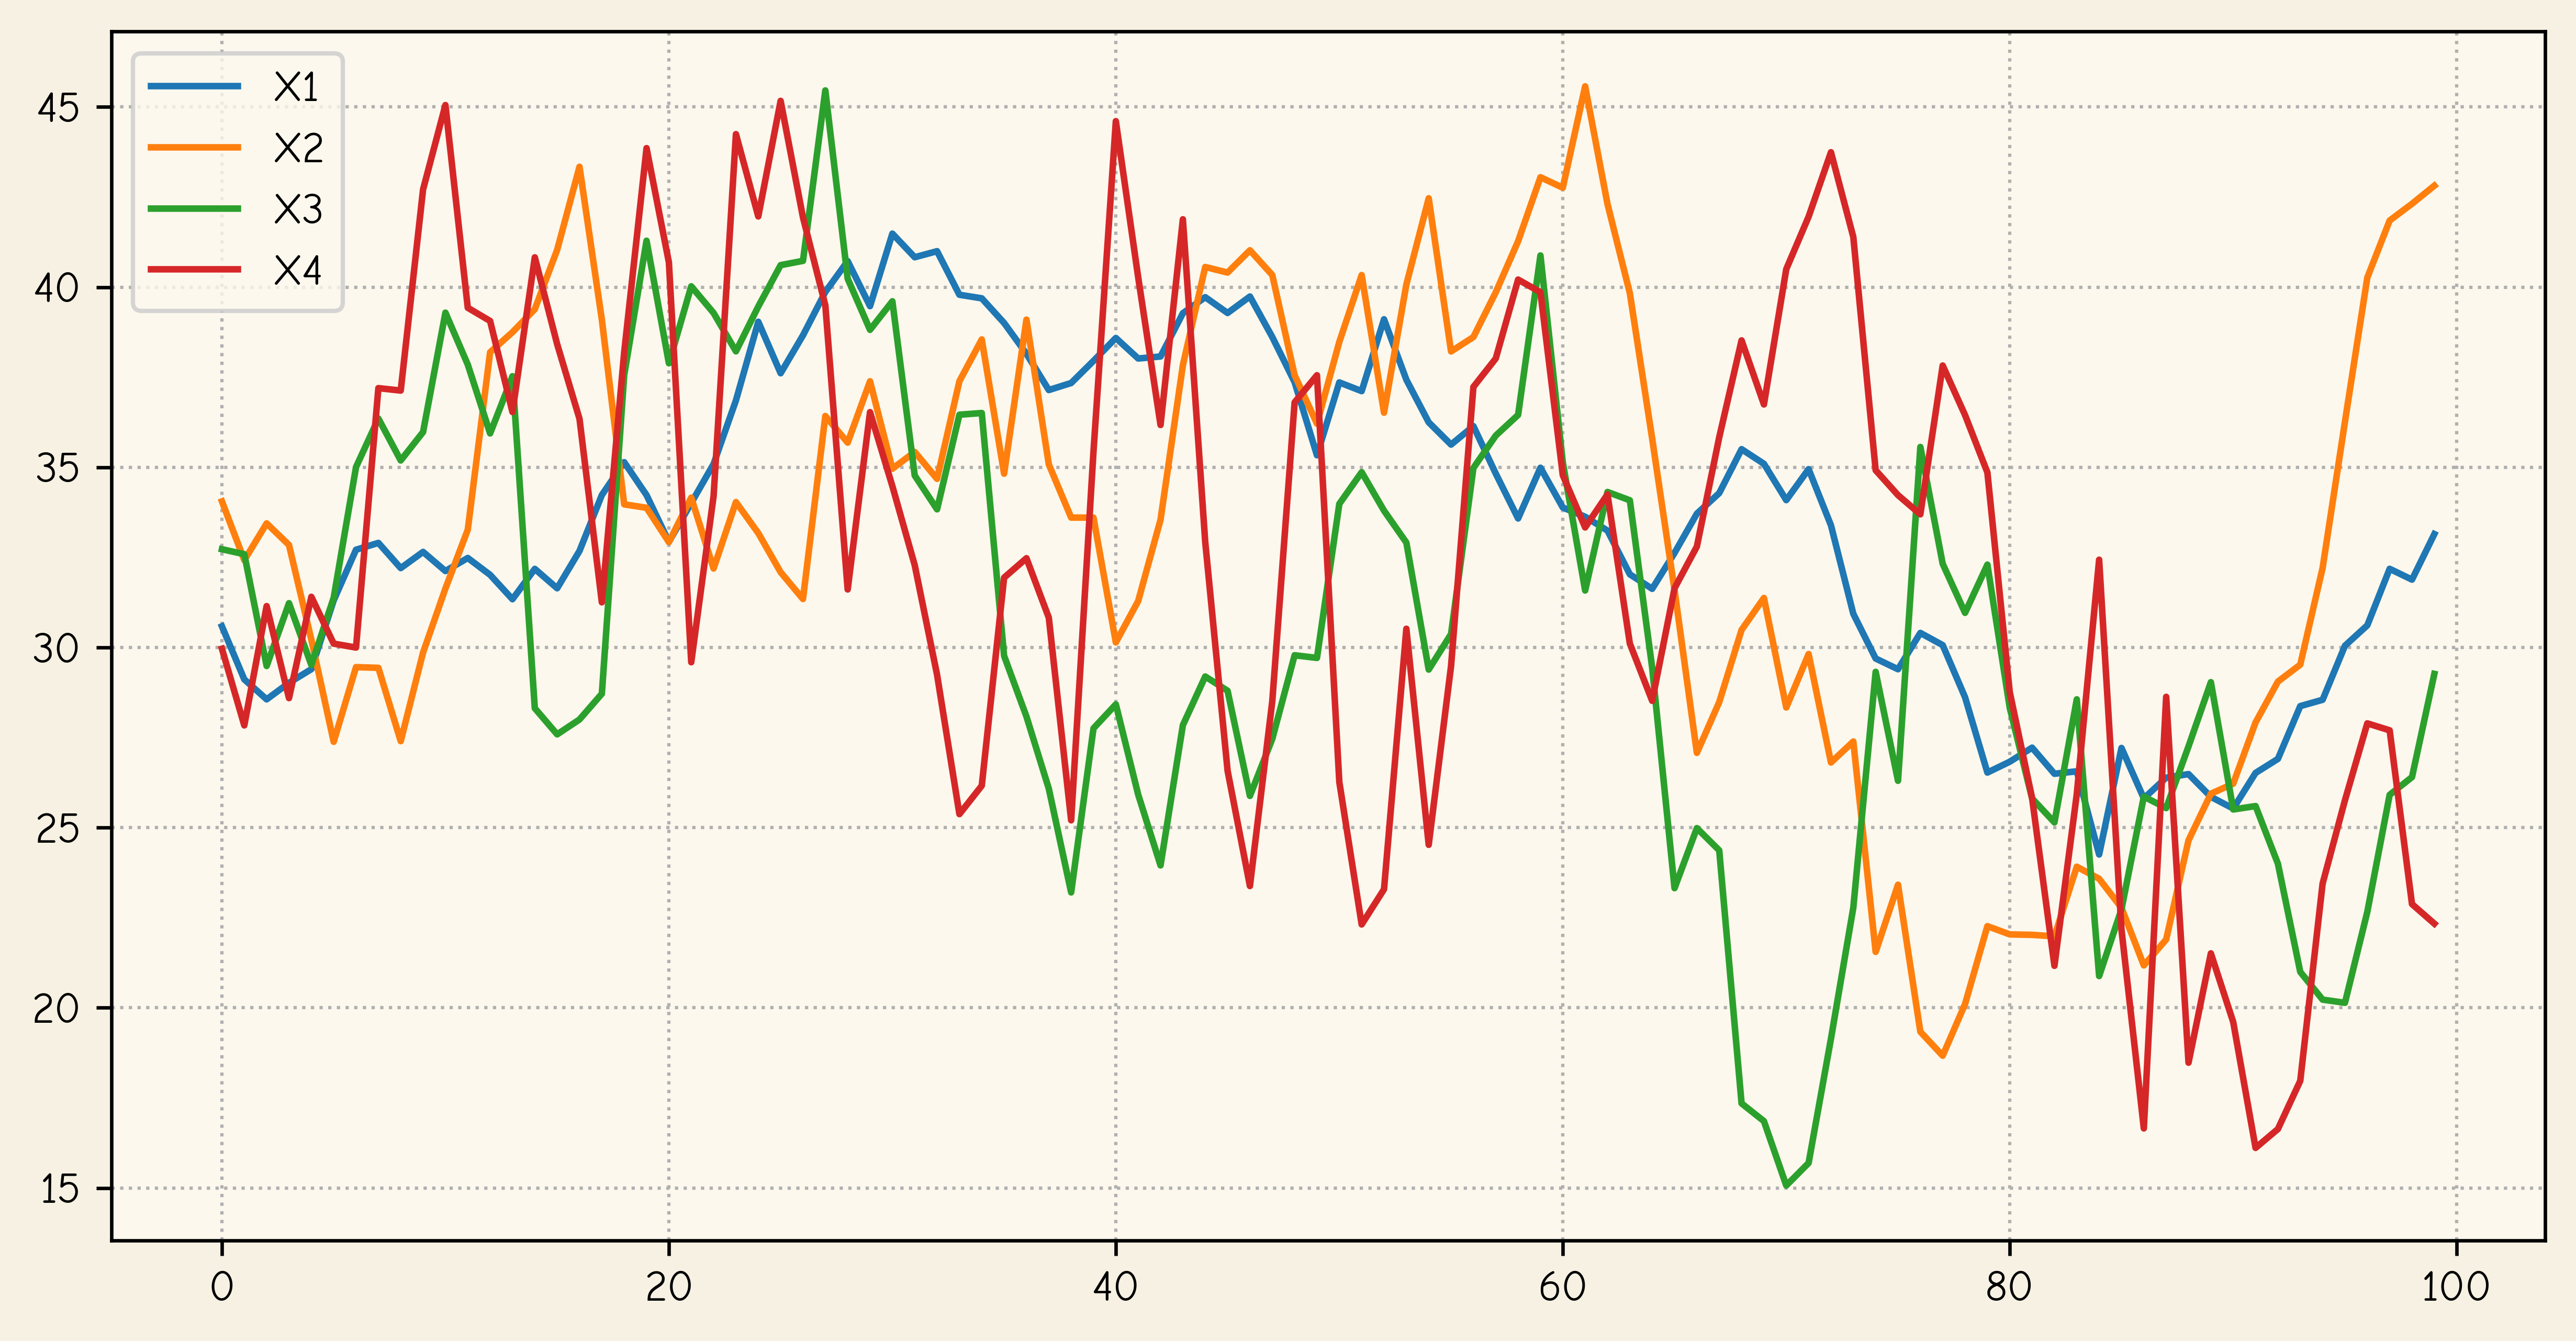

In [22]:
num_obs = 100
t_3 = pd.DataFrame(range(0, num_obs), columns=["t"])
t_3["X1"] = np.random.normal(30, 7, len(t_3))
t_3["X2"] = np.random.normal(30, 7, len(t_3))
t_3["X3"] = np.random.normal(30, 7, len(t_3))
t_3["X4"] = np.random.normal(30, 7, len(t_3))
for i in range(1, len(t_3)):
    t_3.iloc[i, 1] = 0.3 + (0.99 * t_3.iloc[i - 1, 1]) + np.random.normal(0, 1)
    t_3.iloc[i, 2] = 1.5 + (0.95 * t_3.iloc[i - 1, 2]) + np.random.normal(0, 2.2)
    t_3.iloc[i, 3] = 3 + (0.9 * t_3.iloc[i - 1, 3]) + np.random.normal(0, 3.1)
    t_3.iloc[i, 4] = 6 + (0.8 * t_3.iloc[i - 1, 4]) + np.random.normal(0, 4.5)

t_3.iloc[:,1:].plot()

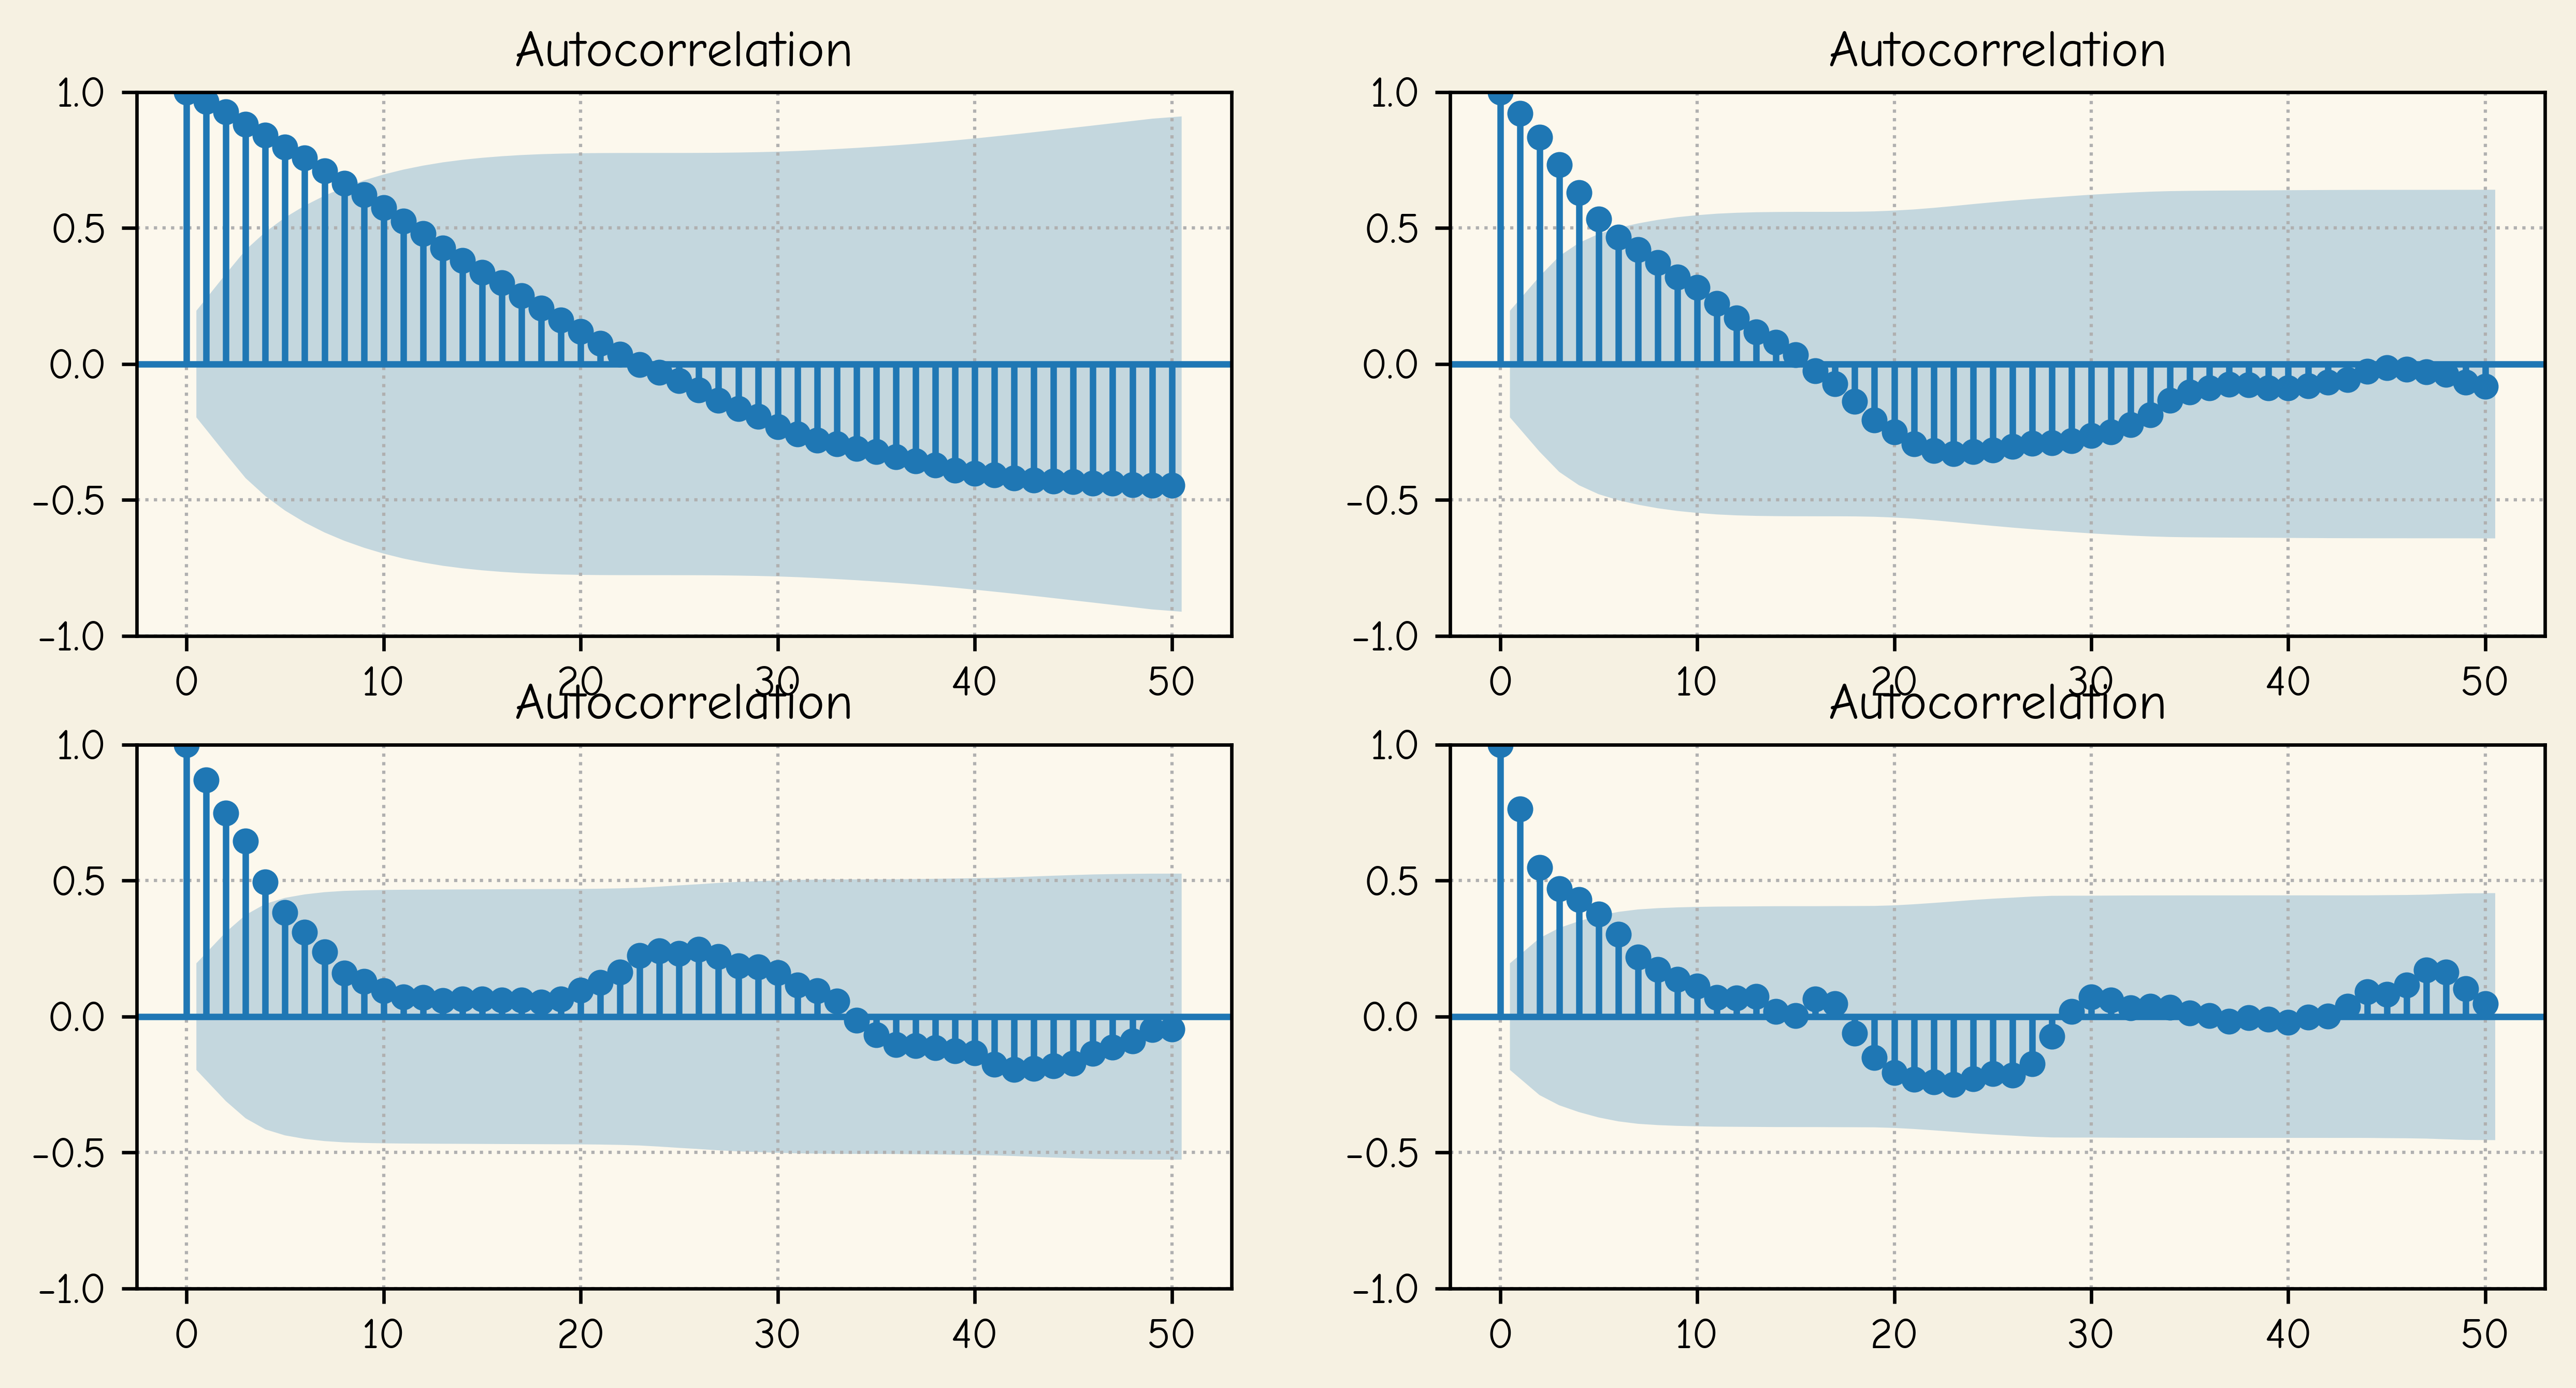

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plot_acf(t_3.X1,ax=axes[0, 0],lags=50);
plot_acf(t_3.X2,ax=axes[0, 1],lags=50);
plot_acf(t_3.X3,ax=axes[1, 0],lags=50);
plot_acf(t_3.X4,ax=axes[1, 1],lags=50);

In [17]:
t_3

t      X1      X2      X3      X4
0    0  33.563  22.964  29.228  33.926
1    1  33.810  25.796  33.884  29.844
2    2  32.548  29.450  33.921  33.746
3    3  33.914  29.319  36.111  31.001
4    4  34.842  28.451  39.276  24.024
..  ..     ...     ...     ...     ...
95  95  30.223  32.137  18.217  26.532
96  96  30.486  33.689  14.954  29.665
97  97  29.807  37.878  17.391  25.154
98  98  30.590  37.975  20.399  26.304
99  99  29.885  37.631  16.412  25.763

[100 rows x 5 columns]

In [18]:
sales = pd.DataFrame([76,70,66,60,70,72,76,80])
acovf=statsmodels.tsa.stattools.acovf(sales),
statsmodels.tsa.stattools.acf(sales)

array([ 1.        ,  0.42195886, -0.04338104, -0.43000894, -0.46601073,
       -0.17285331,  0.04159213,  0.14870304])

In [19]:
acovf[0]/acovf[0][0]

array([ 1.        ,  0.42195886, -0.04338104, -0.43000894, -0.46601073,
       -0.17285331,  0.04159213,  0.14870304])

## 3.2 PROBLEMS

#### Problem 3.2

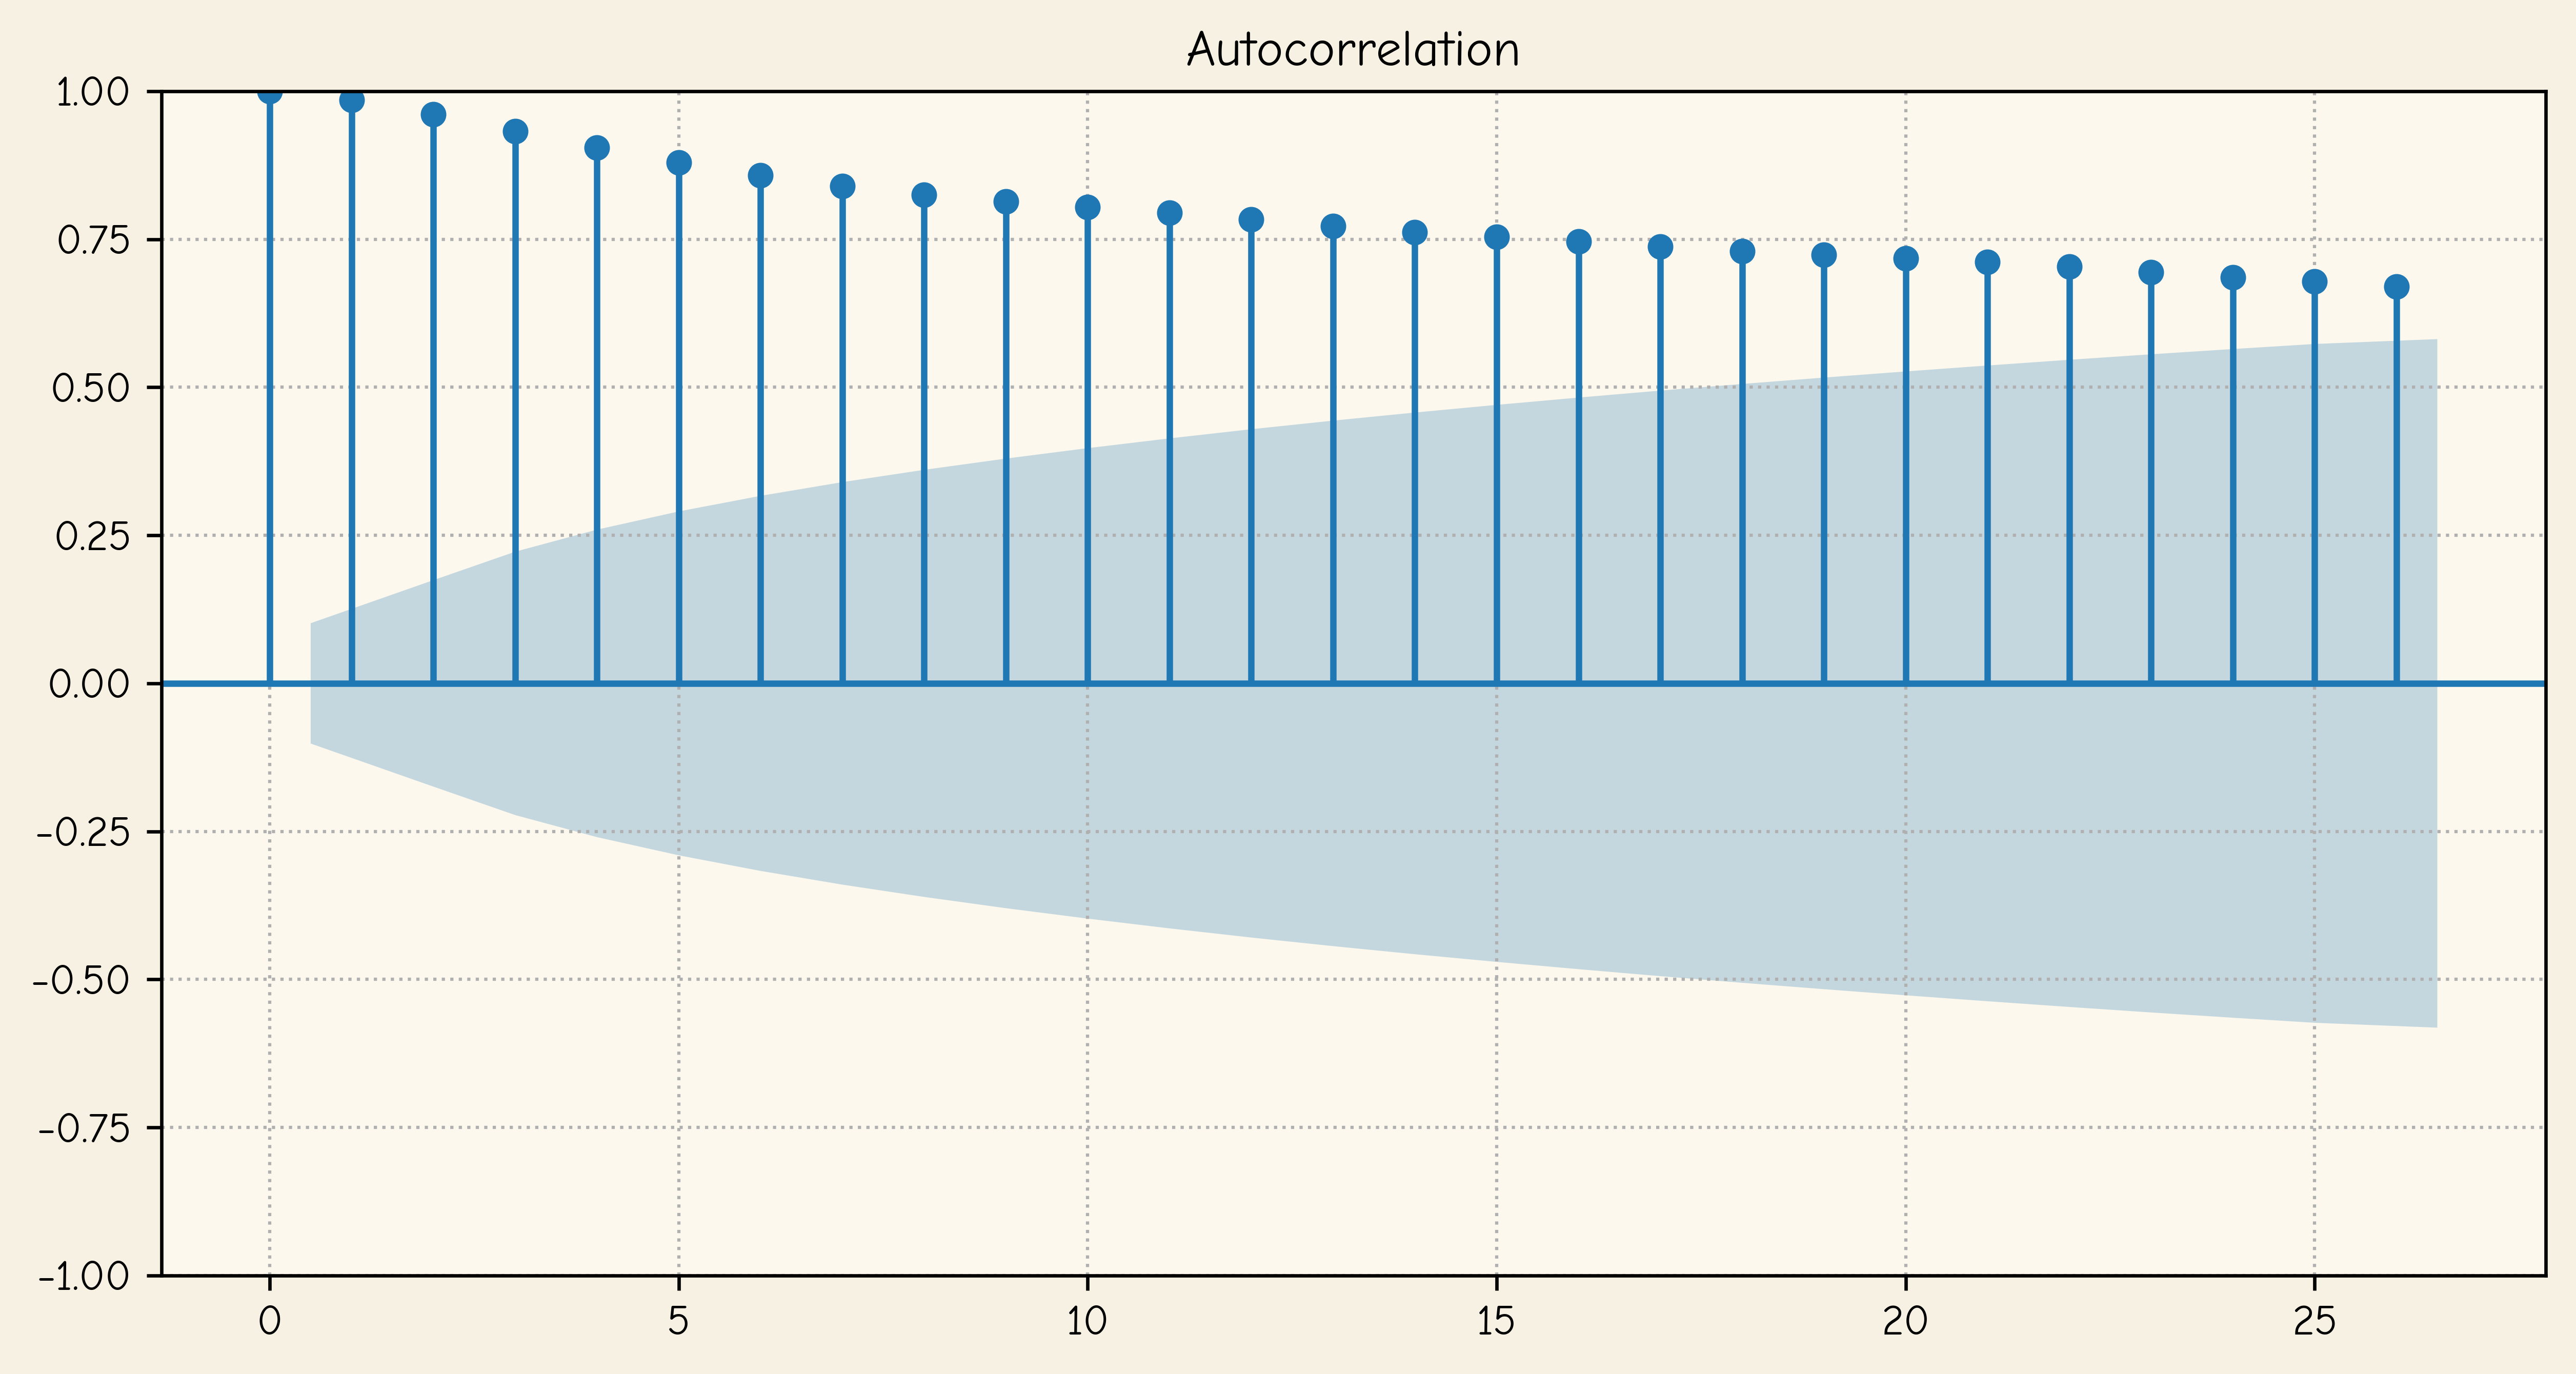

In [28]:
wtcrude = pd.read_csv("wtcrude2020.csv")
plot_acf(wtcrude);

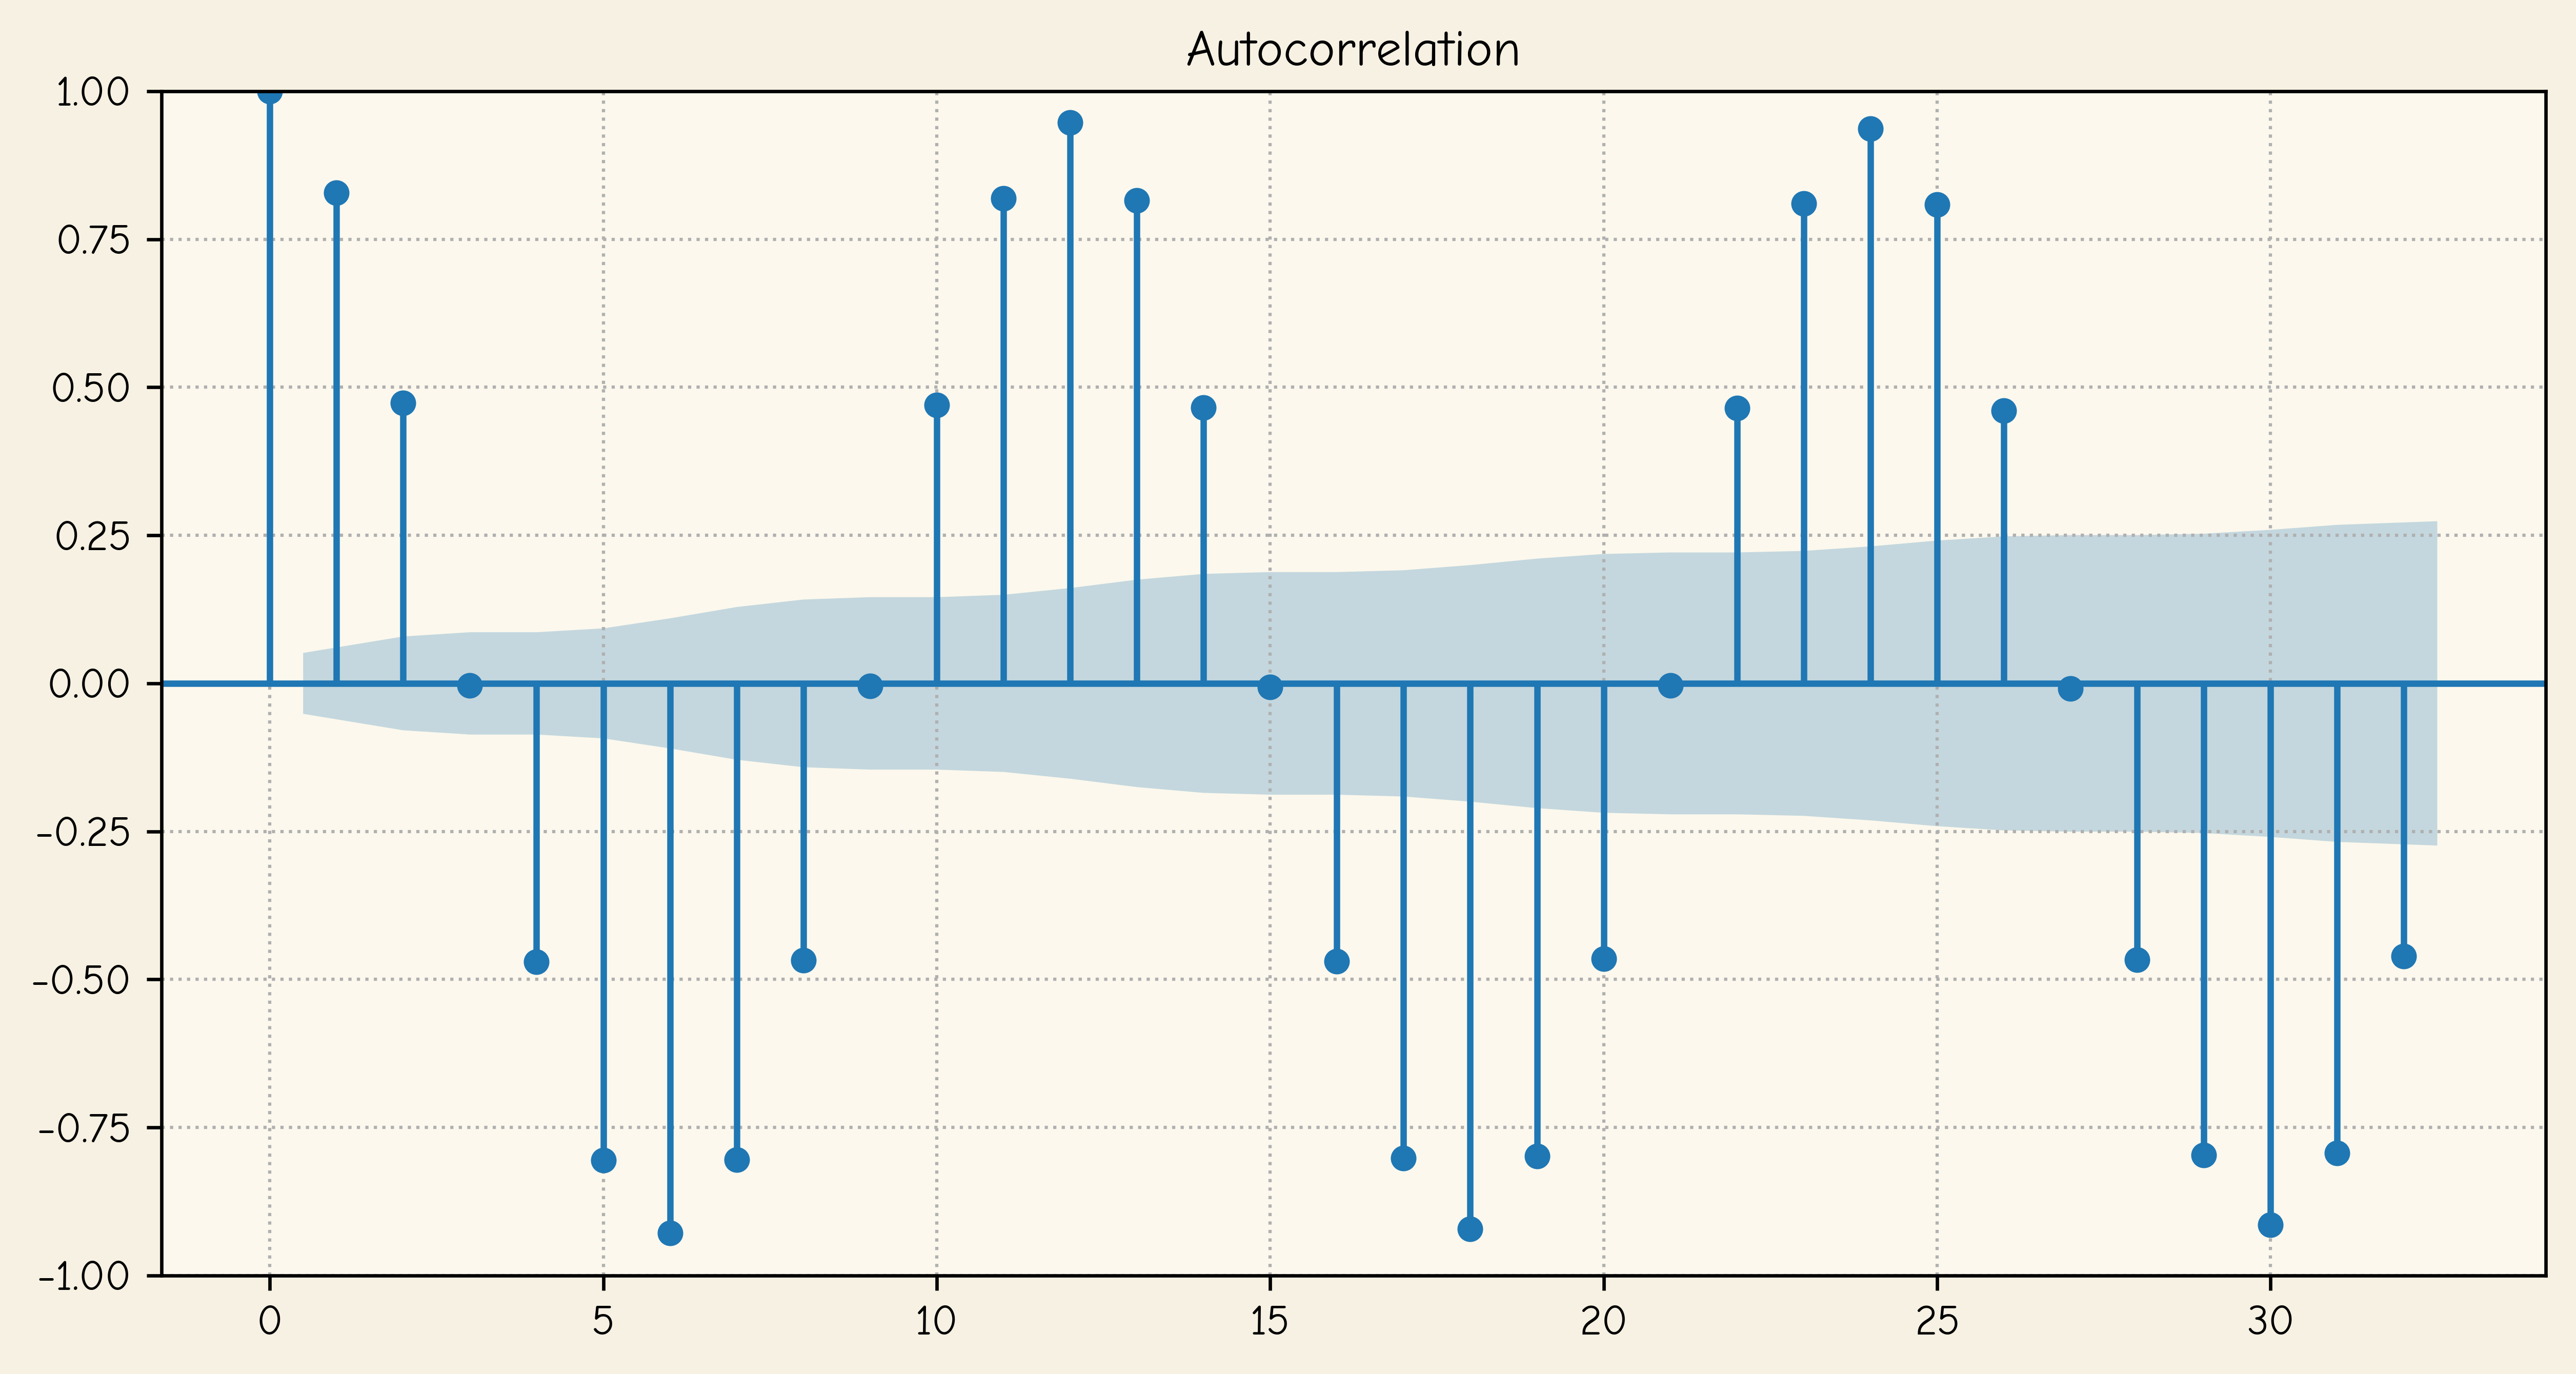

In [27]:
dfw_mon = pd.read_csv("dfw.mon.csv")
plot_acf(dfw_mon);